본 커널은 @Siddharth Yadav님의 [Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series?fbclid=IwAR2bO4aJEY5M9GZPfrpzqS2dRwbbE9o6kkjPvEvDj7WyaGyW8sVjOh2DgQ8)과 [Intro to Recurrent Neural Networks LSTM | GRU](https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru)을 번역한 커널입니다.

> 최종 업데이트 : 2019.06.13

# 역자의 말
저는 수원대학교 통계정보학과에 재학 중인 허재혁입니다. 현재 4학년 재학중이며 분당서울대학교병원 신경외과 연구원으로 약 1년간 머신러닝을 통한 데이터 분석 및 A.I 개발을 하였고 현재는 [데이콘](dacon.io)으로 이직 후 데이터 사이언티스트로서 재직예정 중 입니다. 본 내용은 kaggle kernels master인 @Siddharth Yadav 님의 내용을 기반으로 캐글 코리아 운영진인 @안수빈 님의 번역하신 내용을 참고하여 수정 및 추가하였습니다. 마지막 학기 시계열 수업을 배우고 공부하기 좋은 자료를 찾던 중 이후 시계열을 처음 접하는 사람과 실제 자료를 통해 Python으로 분석하는 방법을 소개하기 좋은 글이라 생각되어 본 내용을 작성하였습니다. 좋은 자료를 공개해주시고 번역해주신 @Siddharth Yadav님과 @안수빈님께 감사의 말씀 드립니다.  

> **`Jaehyuk Heo Profile`**: https://www.notion.so/tootouch/Jaehyuk-Heo-resume-c8e0eff6b5ba444b8babd93a762fcd07

- 일부 단어는 그 의미를 살리기 위해 번역하지 않고 사용했습니다.
- 소제목은 의미를 더 확실하게 전하기 위해 원문을 그대로 가져왔습니다.
- 메서드나 주제에서 설명이 부족한 경우, 추가한 내용이 있습니다.
- 실험 내용에 있어서 결과 비교를 위해 본 내용과 다른 부분이 있습니다.

# Aim

이 플랫폼을 시작한 첫 주부터 저는 **시계열 분석**이라는 주제에 매료되었습니다. 이 커널을 시계열 분석에서 다양한 주제를 다루기 위해 만든 커널입니다. 저는 시계열 분석에서 초보자와 숙련자 모두에게 ultimate reference(궁극적 레퍼런스)를 만들고 싶었습니다. 


# Some important things
1. 이 커널은 현재진행형으로, home feed에서 볼 때마다 새로운 컨텐츠를 확인하실 수 있을 것입니다.
2. 다양한 과정을 마친 후, 이 분야에 집중하고 있습니다. advanced한 내용을 전달하기 위해 더 연구하고 있습니다.
3. 특정 주제에 대한 제안은 친절한 댓글을 통해 부탁드립니다.
4. 만약 이 커널이 도움이 됬다면 커널에 upvote를 눌러주세요.

In [263]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

# preprocessing
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# graph
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

# modeling
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD

# evaluation
import math
from sklearn.metrics import mean_squared_error

# seed
from numpy.random import normal, seed

print(os.listdir("../dataset"))

['historical-hourly-weather-data', 'stock-time-series-20050101-to-20171231']


- <a href='#1'>1. Introduction to date and time</a>
    - <a href='#1.1'>1.1 Importing time series data</a>
    - <a href='#1.2'>1.2 Cleaning and preparing time series data</a>
    - <a href='#1.3'>1.3 Visualizing the datasets</a>
    - <a href='#1.4'>1.4 Timestamps and Periods</a>
    - <a href='#1.5'>1.5 Using date_range</a>
    - <a href='#1.6'>1.6 Using to_datetime</a>
    - <a href='#1.7'>1.7 Shifting and lags</a>
    - <a href='#1.8'>1.8 Resampling</a>
- <a href='#2'>2. Finance and Statistics</a>
    - <a href='#2.1'>2.1 Percent change</a>
    - <a href='#2.2'>2.2 Stock returns</a>
    - <a href='#2.3'>2.3 Absolute change in successive rows</a>
    - <a href='#2.4'>2.4 Comaring two or more time series</a>
    - <a href='#2.5'>2.5 Window functions</a>
    - <a href='#2.6'>2.6 OHLC charts</a>
    - <a href='#2.7'>2.7 Candlestick charts</a>
    - <a href='#2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
- <a href='#3'>3. Time series decomposition and Random Walks</a>
    - <a href='#3.1'>3.1 Trends, Seasonality and Noise</a>
    - <a href='#3.2'>3.2 White Noise</a>
    - <a href='#3.3'>3.3 Random Walk</a>
    - <a href='#3.4'>3.4 Stationarity</a>
- <a href='#4'>4. Modelling using statsmodels</a>
    - <a href='#4.1'>4.1 AR models</a>
    - <a href='#4.2'>4.2 MA models</a>
    - <a href='#4.3'>4.3 ARMA models</a>
    - <a href='#4.4'>4.4 ARIMA models</a>
    - <a href='#4.5'>4.5 VAR models</a>
    - <a href='#4.6'>4.6 State space methods</a>
        - <a href='#4.6.1'>4.6.1 SARIMA models</a>
        - <a href='#4.6.2'>4.6.2 Unobserved components</a>
- <a href='#5'>5. Modelling using Neural Network</a>
    - <a href='#5.1'>5.1 Recurrent Neural Networks(RNN)</a>
    - <a href='#5.2'>5.2 Long Short Term Memory(LSTM)</a>
    - <a href='#5.3'>5.3 Gated Recurrent Units(GRU)</a>

# <a id='1'>1. Introduction to date and time</a>

## <a id='1.1'>1.1 Importing time series data</a>

### How to import data?

우선 이 커널에서 필요한 데이터셋을 불러와야합니다.
pd.read_csv()에서 두 개의 매개변수를 사용해서 불러옵시다.

- **parse_dates** 매개변수를 사용하여 필요한 시계열을 datetime 열로 변환합니다. 
- dataframe의 index는 **index_col**로 지정합니다.

아래 코드를 보면 더 이해가 쉬울 것입니다.

#### Data being used:-

사용하는 데이터는 다음과 같습니다.
1. Google  Stocks Data (구글 주식 데이터)
2. Humidity in different world cities (세계 여러 도시의 습도 데이터)
3. Microsoft  Stocks Data (마이크로소프트 주식 데이터)
3. Pressure in different world cities (세계 여러 도시의 기압 데이터)

In [136]:
google = pd.read_csv('../dataset/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [137]:
humidity = pd.read_csv('../dataset/historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00        NaN      81.0            NaN     93.0         24.0   
2017-11-29 21:00:00        NaN      71.0            NaN     87.0         21.0   
2017-11-29 22:00:00        NaN      71.0            NaN     93.0         23.0   
2017-11-29 23:00:00        NaN      71.0            NaN     87.0         14.0   
2017-11-30 00:00:00        NaN      76.0            NaN     75.0         56.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00       72.0       18.0     68.0         37.0    18.0  ...   
2017-11-29 21:00:00       72.0       18.0     73.0         34.0    12.0  ...   
2017-11-29 22:00:00       68.0       17.0     60.0         32.0    15.0  ...   
2017-11-29 23:00:00       63.0       17.0     33.0         30.0    28.0  ...   
2017-11-30 00:00:00       72.0       17.0     23.0         34.0    31.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00          27.0       NaN      64.0    37.0        NaN   
2017-11-29 21:00:00          29.0       NaN      59.0    74.0        NaN   
2017-11-29 22:00:00          31.0       NaN      66.0    74.0        NaN   
2017-11-29 23:00:00          26.0       NaN      58.0    56.0        NaN   
2017-11-30 00:00:00          32.0       NaN      58.0    56.0        NaN   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2017-11-29 20:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 21:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 22:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 23:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-30 00:00:00                NaN    NaN    NaN        NaN        NaN  

[5 rows x 36 columns]

## <a id='1.2'>1.2 Cleaning and preparing time series data</a>

### How to prepare data?

구글 주식 데이터는 누락 데이터가 없지만, 습도 데이터는 누락데이터가 꽤 있습니다.

누락 데이터는 **`fillna()`** 메서드와 **ffill** 매개변수를 이용해 채웁니다. fillna()의 매개변수는 다음과 같은 매개변수가 있습니다. 이는 후에도 언급하니 가볍게 넘어가면 될 것 같습니다.

- ffill : 앞의 값을 관찰한 값으로 채워넣음
- bfill : 뒤의 값을 관찰한 값으로 채워넣음

In [138]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   
2012-10-01 14:00:00       76.0      80.0           87.0     80.0         88.0   
2012-10-01 15:00:00       76.0      80.0           86.0     80.0         88.0   
2012-10-01 16:00:00       77.0      80.0           85.0     79.0         88.0   
2012-10-01 17:00:00       78.0      79.0           84.0     79.0         88.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0  ...   
2012-10-01 14:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 15:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 16:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 17:00:00       80.0       21.0     24.0         49.0    63.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 13:00:00          71.0      58.0      93.0    68.0       50.0   
2012-10-01 14:00:00          70.0      57.0      91.0    68.0       51.0   
2012-10-01 15:00:00          70.0      57.0      87.0    68.0       51.0   
2012-10-01 16:00:00          69.0      57.0      84.0    68.0       52.0   
2012-10-01 17:00:00          69.0      57.0      80.0    68.0       54.0   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2012-10-01 13:00:00               63.0   22.0   51.0       51.0       50.0  
2012-10-01 14:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 15:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 16:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 17:00:00               62.0   23.0   51.0       51.0       50.0  

[5 rows x 36 columns]

## <a id='1.3'>1.3 Visualizing the datasets</a>

`asfreq` 메서드는 시계열을 특정 frequency로 변환합니다. (30S = 30초, M = 매월) 
upsampling 또는 downsampling에 사용할 수 있습니다.

여기서는 매개변수를 'M'으로 전달하였고, 이는 매월 빈도를 의미합니다.

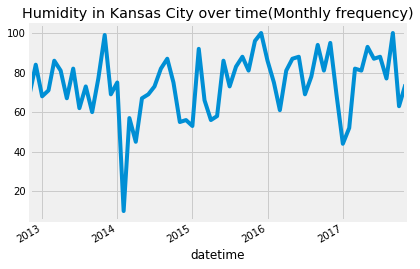

In [139]:
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

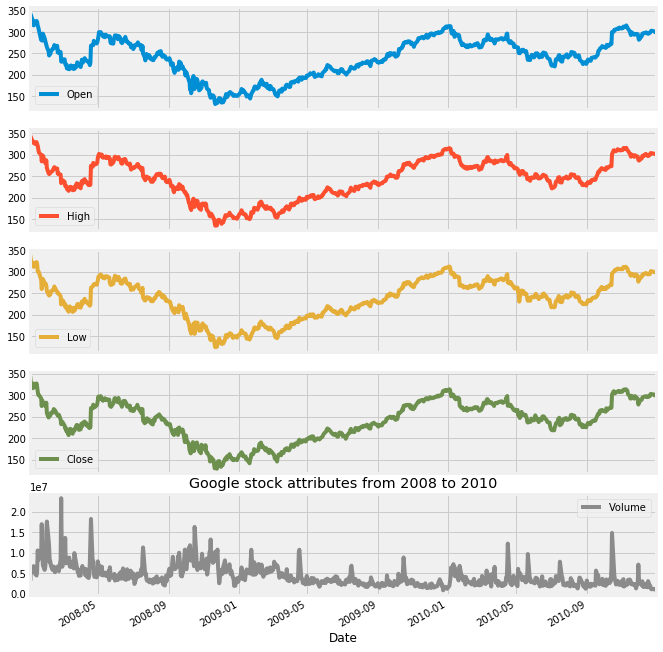

In [140]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

## <a id='1.4'>1.4 Timestamps and Periods</a>

### What are timestamps and periods and how are they useful?

timestamp와 period는 무엇이고, 어떻게 유용할까요?

- **Timestamp**는 특정 시점을 나타내기 위해 사용됩니다.

- **Period**는 특정 기간을 나타내기 위해 사용됩니다. 

Periods는 기간동안 특정 이벤트가 있는지 체크하는데 사용할 수 있습니다. 각각은 서로 변환가능합니다.
우선 아래 예시로 생성 방법을 살펴보겠습니다.

In [141]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [142]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

timestamp와 period는 이런 비교가 가능합니다.

In [143]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

변환의 예시는 다음과 같습니다.

In [144]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [145]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## <a id='1.5'>1.5 Using date_range</a>

### What is date_range and how is it useful?

date_range는 무엇이고, 어떻게 유용할까요?

**date_range**는 고정 frequency datetimeindex를 반환하는 메서드입니다.
이것도 예시를 봐야 이해가 빠를 것 같습니다.


이는 기존 데이터에서 본인만의 시계열 요소를 만들거나 전체 데이터를 정리(arranging)하는데 사용할 수 있습니다.

In [146]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [147]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

아래와 같이 시작과 종료 시점 중 하나만 있어도 되고, 원하는 period에서 시계열을 만들 수 있습니다.

In [148]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [149]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## <a id='1.6'>1.6 Using to_datetime</a> 

`pandas.to_datetime()`은 Dataframe을 datetime으로 변환하는 함수입니다.

In [150]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

year  month  day
0  2015      2    4
1  2016      3    5

In [151]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [152]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## <a id='1.7'>1.7 Shifting and lags</a>

우리는 원하는 기간을 shift하여 index를 원하는 frequency로 이동변환 가능합니다.

이는 과거와 현재의 시계열을 비교하는데 유용합니다.

아래는 데이터를 월 단위로 바꾼 후에 10개월을 shift한 후 시각화한 그래프입니다.

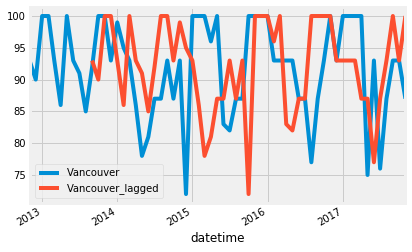

In [153]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## <a id='#1.8'>1.8 Resampling</a>

**Upsampling** : 시계열을 low frequency에서 high frequency로 변환(리샘플링)합니다. 누락된 데이터를 채우거나 보간하는 방법을 포함합니다. (월 데이터 -> 일 데이터)

**Downsampling** : 시계열을 high frequency에서 low frequency로 변환(리샘플링)합니다. 기존 데이터를 집계하는 것을 포함합니다. (주간 데이터 -> 월 데이터)

In [154]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('../dataset/historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00        NaN    1031.0            NaN   1030.0       1016.0   
2017-11-29 21:00:00        NaN    1030.0            NaN   1030.0       1016.0   
2017-11-29 22:00:00        NaN    1030.0            NaN   1029.0       1015.0   
2017-11-29 23:00:00        NaN    1029.0            NaN   1028.0       1016.0   
2017-11-30 00:00:00        NaN    1029.0            NaN   1028.0       1015.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00     1017.0     1021.0   1018.0       1025.0  1016.0  ...   
2017-11-29 21:00:00     1017.0     1020.0   1018.0       1024.0  1018.0  ...   
2017-11-29 22:00:00     1016.0     1020.0   1017.0       1024.0  1018.0  ...   
2017-11-29 23:00:00     1016.0     1020.0   1016.0       1024.0  1020.0  ...   
2017-11-30 00:00:00     1017.0     1019.0   1016.0       1024.0  1021.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00        1021.0       NaN    1021.0  1017.0        NaN   
2017-11-29 21:00:00        1021.0       NaN    1023.0  1019.0        NaN   
2017-11-29 22:00:00        1022.0       NaN    1024.0  1019.0        NaN   
2017-11-29 23:00:00        1023.0       NaN    1026.0  1022.0        NaN   
2017-11-30 00:00:00        1024.0       NaN    1027.0  1023.0        NaN   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2017-11-29 20:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 21:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 22:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 23:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-30 00:00:00                NaN    NaN    NaN        NaN        NaN  

[5 rows x 36 columns]

시작부터 채워야하는 데이터들이 보입니다. 이는 다음과 같이 채울 수 있습니다.

In [155]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00     1021.0    1031.0         1013.0   1030.0       1016.0   
2017-11-29 21:00:00     1021.0    1030.0         1013.0   1030.0       1016.0   
2017-11-29 22:00:00     1021.0    1030.0         1013.0   1029.0       1015.0   
2017-11-29 23:00:00     1021.0    1029.0         1013.0   1028.0       1016.0   
2017-11-30 00:00:00     1021.0    1029.0         1013.0   1028.0       1015.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00     1017.0     1021.0   1018.0       1025.0  1016.0  ...   
2017-11-29 21:00:00     1017.0     1020.0   1018.0       1024.0  1018.0  ...   
2017-11-29 22:00:00     1016.0     1020.0   1017.0       1024.0  1018.0  ...   
2017-11-29 23:00:00     1016.0     1020.0   1016.0       1024.0  1020.0  ...   
2017-11-30 00:00:00     1017.0     1019.0   1016.0       1024.0  1021.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00        1021.0    1020.0    1021.0  1017.0      984.0   
2017-11-29 21:00:00        1021.0    1020.0    1023.0  1019.0      984.0   
2017-11-29 22:00:00        1022.0    1020.0    1024.0  1019.0      984.0   
2017-11-29 23:00:00        1023.0    1020.0    1026.0  1022.0      984.0   
2017-11-30 00:00:00        1024.0    1020.0    1027.0  1023.0      984.0   

                     Tel Aviv District  Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                     
2017-11-29 20:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 21:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 22:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 23:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-30 00:00:00             1011.0  968.0  1023.0     1023.0     1011.0  

[5 rows x 36 columns]

In [156]:
pressure = pressure.fillna(method='bfill')
pressure.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00      807.0    1024.0         1009.0   1027.0       1013.0   
2012-10-01 14:00:00      807.0    1024.0         1009.0   1027.0       1013.0   
2012-10-01 15:00:00      807.0    1024.0         1009.0   1028.0       1013.0   
2012-10-01 16:00:00      807.0    1024.0         1009.0   1028.0       1013.0   
2012-10-01 17:00:00      807.0    1024.0         1009.0   1029.0       1013.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 13:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 14:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 15:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 16:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 17:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 13:00:00        1014.0    1012.0    1001.0  1014.0      984.0   
2012-10-01 14:00:00        1014.0    1012.0     986.0  1014.0      984.0   
2012-10-01 15:00:00        1014.0    1012.0     945.0  1014.0      984.0   
2012-10-01 16:00:00        1014.0    1012.0     904.0  1014.0      984.0   
2012-10-01 17:00:00        1014.0    1012.0     863.0  1014.0      984.0   

                     Tel Aviv District   Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                      
2012-10-01 13:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 14:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 15:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 16:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 17:00:00             1012.0  1010.0  1013.0     1013.0      990.0  

[5 rows x 36 columns]

- **ffill** 파라미터를 사용하면 마지막 유효 관측치를 전파하여 데이터의 갭을 채웁니다.
- **bfill** 파라미터를 사용하면 다음 유효 관측치를 전파하여 데이터의 갭을 채웁니다.

In [157]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

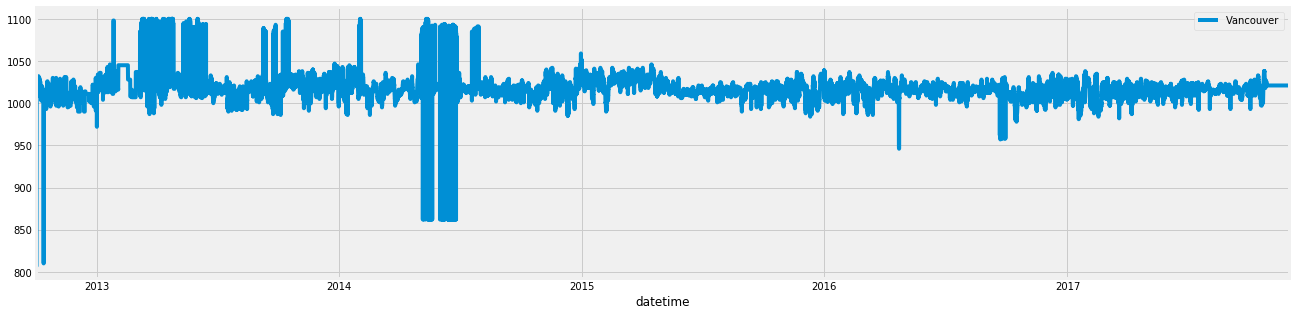

In [158]:
pressure['Vancouver'].plot(figsize=(20,5), legend=True)

기존 데이터는 1시간 단위로 존재했습니다. 이를 3일 단위로 다운샘플링해보겠습니다.
`resample` 메서드를 사용했고, 평균을 사용했습니다.

In [159]:
# We downsample from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-07  1013.930556  1017.444444    1016.597222  1018.736111  1013.416667   
2012-10-10  1015.000000  1015.430556    1014.833333  1018.416667  1010.694444   
2012-10-13  1008.152778  1018.111111    1021.069444  1015.930556  1017.277778   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-07  1014.222222  1012.888889  1011.861111  1005.833333  1020.458333   
2012-10-10  1014.013889  1000.166667  1005.611111   986.000000   984.486111   
2012-10-13  1018.375000  1015.666667  1015.500000  1013.625000  1010.444444   

            ...  Philadelphia     New York     Montreal       Boston  \
datetime    ...                                                        
2012-10-01  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  ...   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-07  ...   1017.958333  1016.750000  1014.152778  1016.305556   
2012-10-10  ...   1018.694444  1017.916667  1016.166667  1017.319444   
2012-10-13  ...   1025.055556  1024.388889  1020.805556  1023.736111   

             Beersheba  Tel Aviv District        Eilat        Haifa  \
datetime                                                              
2012-10-01  985.050847        1012.949153  1011.796610  1013.000000   
2012-10-04  984.930556        1013.083333  1012.611111  1013.000000   
2012-10-07  982.972222        1013.027778  1007.555556  1013.000000   
2012-10-10  979.763889        1006.527778   998.763889  1012.333333   
2012-10-13  984.527778        1013.027778  1007.194444  1013.000000   

              Nahariyya   Jerusalem  
datetime                             
2012-10-01  1013.000000  990.525424  
2012-10-04  1013.000000  990.083333  
2012-10-07  1013.000000  989.833333  
2012-10-10  1012.333333  987.888889  
2012-10-13  1013.000000  990.430556  

[5 rows x 36 columns]

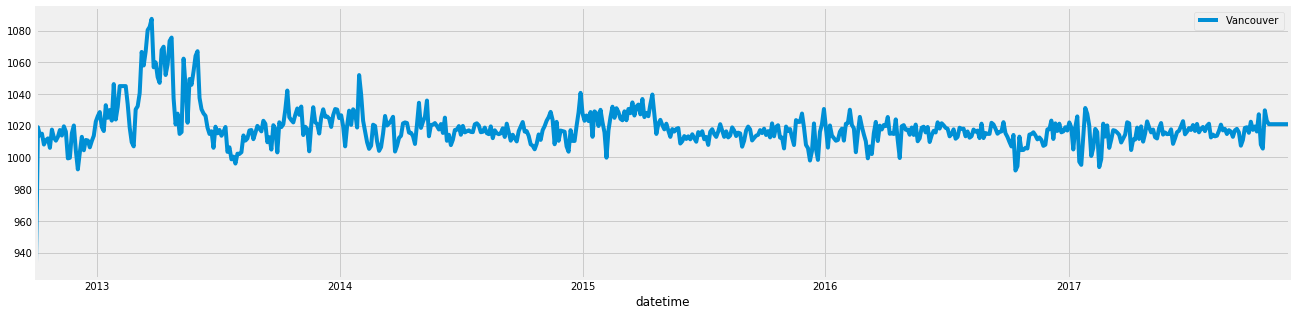

In [160]:
pressure['Vancouver'].plot(figsize=(20,5), legend=True)

아래와 같이 데이터 수가 1/72가 된 것을 확인할 수 있습니다.

In [161]:
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

이제 이를 역으로 3일간격을 1일 간격으로 업샘플링해보겠습니다.
pad()는 패딩을 의미합니다.

In [162]:
pressure = pressure.resample('D').pad()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-02   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-03   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-05  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-02  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-03  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-05  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   

            ...  Philadelphia     New York     Montreal       Boston  \
datetime    ...                                                        
2012-10-01  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-02  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-03  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  ...   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-05  ...   1018.097222  1017.680556  1017.180556  1019.805556   

             Beersheba  Tel Aviv District        Eilat   Haifa  Nahariyya  \
datetime                                                                    
2012-10-01  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-02  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-03  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-04  984.930556        1013.083333  1012.611111  1013.0     1013.0   
2012-10-05  984.930556        1013.083333  1012.611111  1013.0     1013.0   

             Jerusalem  
datetime                
2012-10-01  990.525424  
2012-10-02  990.525424  
2012-10-03  990.525424  
2012-10-04  990.083333  
2012-10-05  990.083333  

[5 rows x 36 columns]

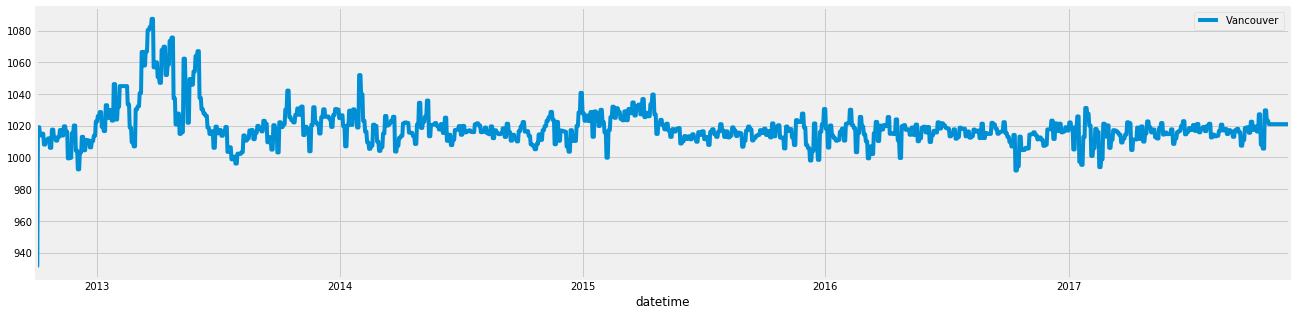

In [163]:
pressure['Vancouver'].plot(figsize=(20,5), legend=True)

In [164]:
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

행의 수가 증가하지만, 데이터가 손실되는 것을 확인할 수 있었습니다.

resampling은 필요에 따라 매우 유용하게 사용할 수 있습니다.

# <a id='2'>2. Finance and statistics</a>

## <a id='2.1'>2.1 Percent change</a>

시계열에서 각 데이터가 이전에 비해 변한 정도를 나타내는 코드입니다.

shift()를 이용해 dataframe에서 최소 단위로 shift를 진행하고, div 메서드로 앞의 값을 나눠주는 방식입니다.

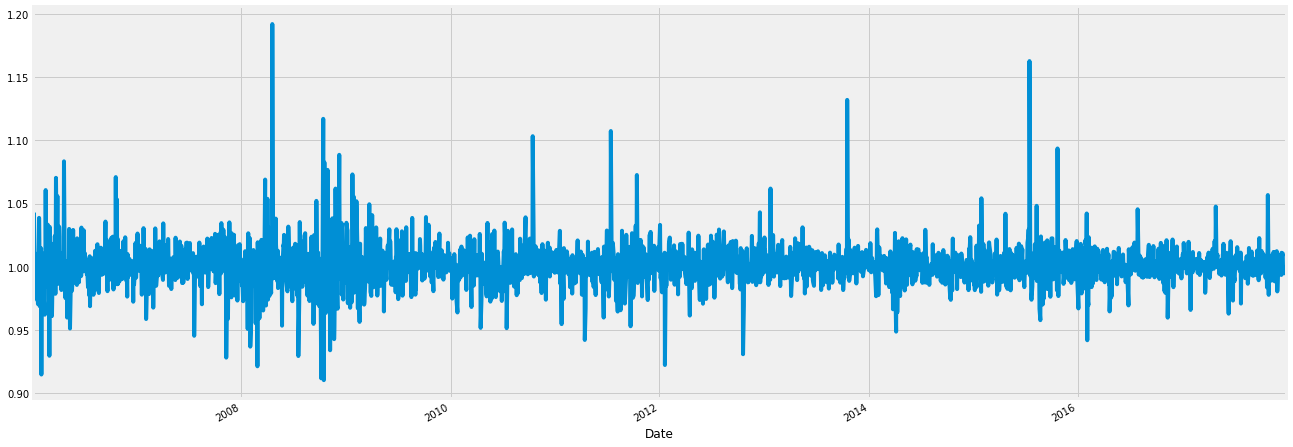

In [165]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

## <a id='2.2'>2.2 Stock returns</a> 

전과 price가 같다면, 변한 정도는 1로 표기될 것입니다.

그렇기에 (비율-1) * 100 의 식을 사용하여 %로 변환합니다.

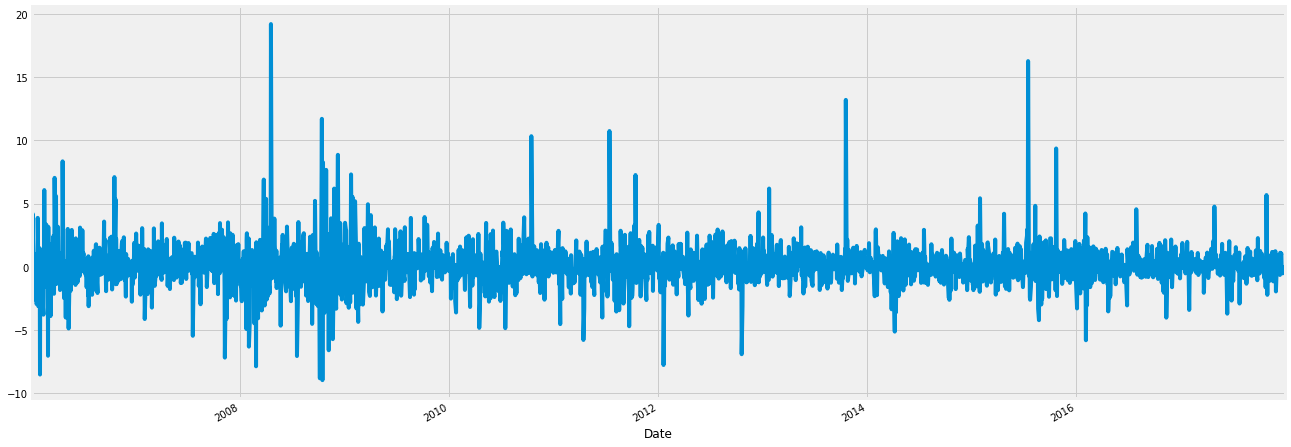

In [166]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

한 줄로 쓰면 다음과 같이 쓸 수 있습니다.

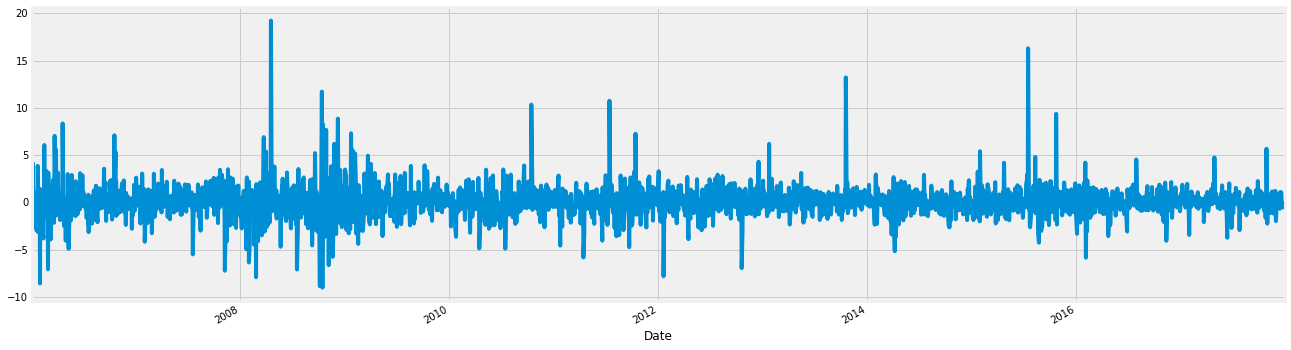

In [167]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

## <a id='2.3'>2.3 Absolute change in successive rows</a>

값 자체의 차이는 diff()를 사용하여 구할 수 있습니다.

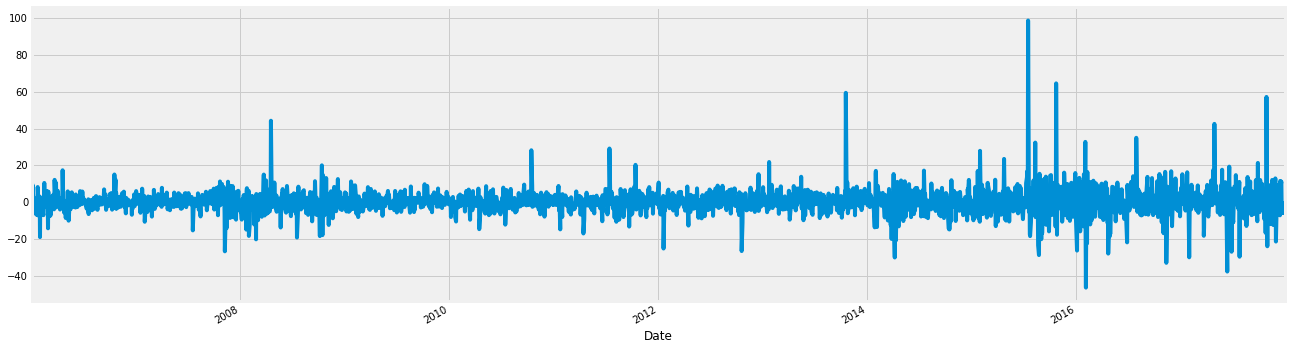

In [168]:
google.High.diff().plot(figsize=(20,6))

## <a id='2.4'>2.4 Comaring two or more time series</a> 

normalization을 통해 2개의 시계열을 비교해보겠습니다.

두 개의 시계열을 각 시계열의 첫 번째 요소로 나누어주어, 비율의 변화를 보는 방법입니다.
두 시리즈의 시작점이 1.0으로 같아 비교가 용이합니다.

이제 구글 주식과 함께 MS 주식 데이터를 불러오겠습니다.

In [169]:
# We choose microsoft stocks to compare them with google
microsoft = pd.read_csv('../dataset/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

아래는 nomalization 전의 그래프입니다.

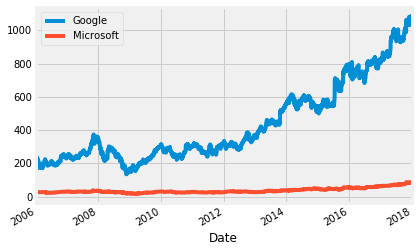

In [170]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

아래는 변환 후 그래프입니다.

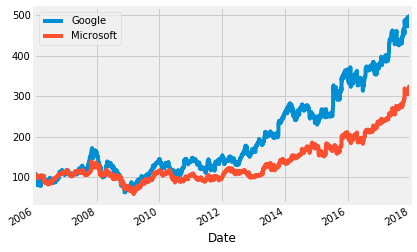

In [171]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

변환을 통해 확인한 그래프에서 시간에 따른 google의 실적이 MS의 실적보다 뛰어난 것을 명확하게 확인할 수 있습니다.

## <a id='2.5'>2.5 Window functions</a>
**Window functions**는 서브-기간을 식별하고, 서브-기간간의 연산에 사용합니다.

- **Rolling** : 일정 구간에서 움직이며 값의 경향성을 구함

- **Expanding** : Contains all prior values

아래는 각 데이터를 90일 window를 이동시키며 평균으로 ploting한 예시입니다.

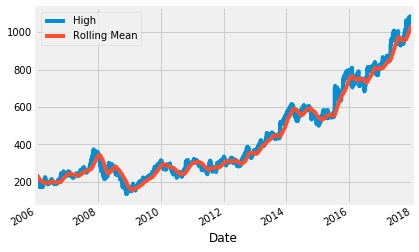

In [172]:
# Rolling window functions
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

원본보다 롤링한 값이 부드러운 것을 확인할 수 있습니다. 

아래는 expanding 예시입니다. default값은 1입니다.

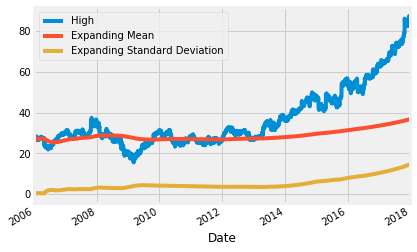

In [173]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## <a id='2.6'>2.6 OHLC charts</a>

**OHLC 차트**는 고가(high), 저가(low), 시가(open), 종가(close)를 보여주는 모든 유형의 가격 차트입니다.
OHLC 차트는 증권, 통화, 주식, 채권, 원자재 등의 시간 경과에 따른 가격 변동을 시각화하고 분석하는 거래 도구(trading tool)로 사용됩니다. OHLC 차트는 시작의 매일 상태를 해석하고, 형성된 패턴에서 미래의 가격 변화를 예측하는데 유용합니다.

OHLC 차트에서 y축은 가격을, x축은 시간을 나타냅니다.
각 단일 기간에서 OHLC 차트는 최고가, 최저가, 시가와 종가를 기호를 이용해 나타내야합니다.
각 기간에서 고가와 저가는 세로선의 길이로 표시됩니다. 시가는 세로선의 왼쪽에 종가는 오른쪽에 표시됩니다.

종가가 시가보다 높은 경우(bullish)와 종가가 시가보다 낮은 경우(bearish)를 색으로 구분하여 표시할 수도 있습니다.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

> 이미지는 외부에서 가져온 이미지입니다. matplotlib 등으로 그린 그림이 아님을 명시합니다.

이제 plotly.graph_objs 모듈을 사용하여 Ohlc 차트를 그려보겠습니다.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

- 2008년 6월 데이터

In [174]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

- 2008년 데이터

In [175]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

- 2006년~2018년 데이터

In [176]:
# OHLC chart of 2006 ~ 2017
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

 ## <a id='2.7'>2.7 Candlestick charts</a>

이 유형의 차트는 OHLC차트와 마찬가지로 증권, 파생 상품, 통화, 주식, 채권, 상품 등에 대한 시간 경과에 따른 가격 변동을 시각화하고 분석하는 거래 도구로 사용됩니다. Candlestick차트에 사용된 기호는 Box Plot과 유사하나 기능이 다르므로 혼동하면 안됩니다.

Candlestick 차트는 촛대 모양의 기호를 사용하여 시가, 종가, 고가, 저가 등의 가격 정보의 여러 비트를 표현합니다.
각 기호는 단일 기간(분, 시, 일, 월 등)에 대한 거래 활동을 압축하여 표현합니다. 각 촛대 기호는 시간 경과에 따른 거래 활동을 보여주기 위해 x축(시간)을 따라 표시됩니다. 

메인 직사각형(a.k.a real body)은 해당 기간의 시가와 종가와 그 범위를 보여줍니다. 그 외의 위와 아래 그림자(또는 심지)는 해당 기간의 거래된 최고가와 최저가를 나타냅니다. 종가가 시가보다 높은 경우(bullish)와 종가가 시가보다 낮은 경우(bearish)를 색으로(하얀 또는 초록 | 검정 또는 빨강) 구분하여 표시할 수도 있습니다.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Candlestick 차트는 시간에 따른 시장 트렌드를 감지하고 예측하는데 유용하고, 각 촛대의 기호와 색상을 통해 시장 상태를 해석하는 데 유용합니다. 예시로 몸통이 길수록 구매와 판매가 활발했으며, 몸통이 짧은 경우 가격 변동이 거의 없고 거래가 적었음을 의미합니다.

Candlestick 차트는 모양과 색상과 같은 다양한 지표를 통해 시장 심리나 여러 패턴을 확인하는데 도움을 줍니다.
총 42개의 패턴이 있고, 이는 단순한 패턴과 복잡한 패턴으로 나뉩니다. 여기서 발견된 패턴은 가격 관계를 표시하거나 향후 시장의 변화를 예측하는 사용할 수 있습니다. 위에 단순한 패턴의 예시를 가져왔으니 가볍게 보면 좋을 것 같습니다.

차트는 시가와 종가 사이에서 발생하는 이벤트를 표현하지 않습니다. 두 가격간의 관계만 나타냅니다. 그렇기에 우리는 특정 단일 기간 내에 얼마나 많은 휘발성 거래가 있었는지 말할 수는 없습니다.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

- 2008년 3월 데이터

In [177]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

- 2008년 데이터

In [178]:
# Candlestick chart of 2008
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

- 2006년 ~ 2018년 데이터

In [179]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

## <a id='2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
- **Autocorrelation** : The autocorrelation function (ACF)은 lags만큼 이동시킨 자기자신과의 공분산을 의미합니다. 정확히는 공분산을 normalization한 값입니다. 현재와 과거의 연관성을 확인할 수 있습니다. 자기상관이라고도 합니다.

- **Partial Autocorrelation** : 부분적인 autocorrelation을 의미합니다. 편자기상관함수라고도 불립니다. 시간단위로 구분된 시계열간의 자기상관도를 확인합니다.


일반적으로 추세를 확인하고 이동 평균 매개 변수의 가능한 값을 추론하는 데 ACF를 사용하고 자동 회귀 부분에는 PACF를 사용합니다.

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelation

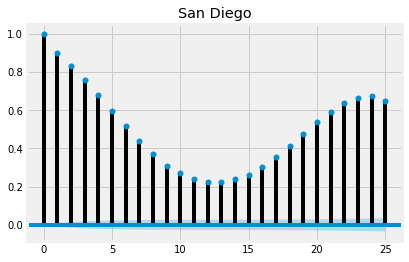

In [180]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

모든 지연은 1에 가깝거나 또는 적어도 신뢰 구간보다 크므로 통계적으로 유의합니다.

## Partial Autocorrelation

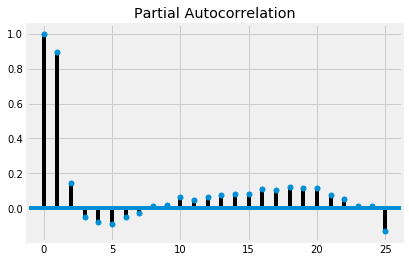

In [181]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

처음 2개 이후 매우 낮은 값을 가집니다. 

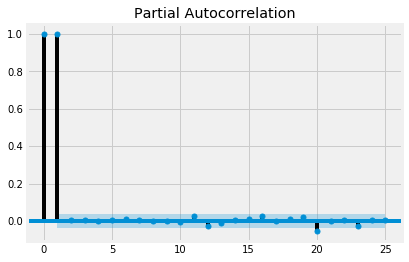

In [182]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)
plt.show()

여기서 0번째, 1번째 및 20번째 lags만 통계적으로 중요합니다.

# <a id='3'>3. Time series decomposition and Random walks</a>

## <a id='3.1'>3.1. Trends, seasonality and noise</a>
시계열에는 다음과 같은 요소가 있습니다.

- Trend : 시계열에서 일정한 상승 또는 하강 기울기
- Seasonality : 시계열에서 명확한 패턴 (사인함수와 같이)
- Noise : 특이점(Outliers) 또는 누락 데이터

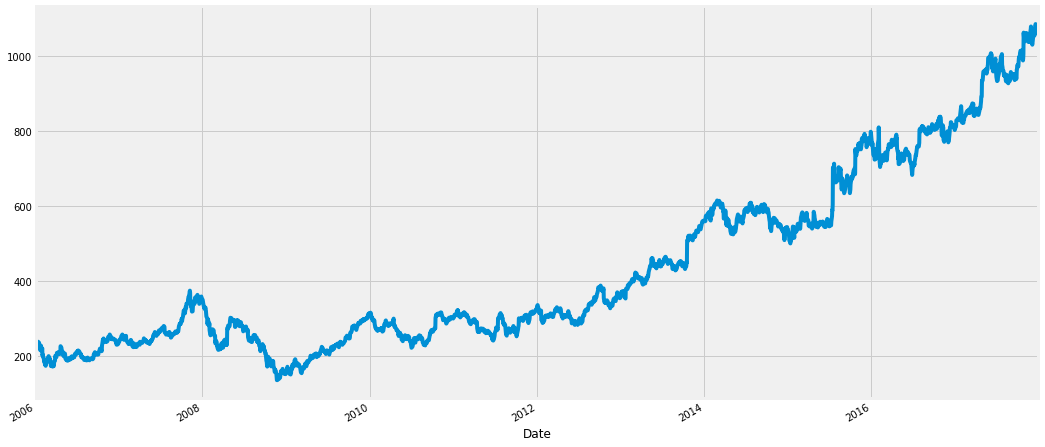

In [183]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

`import statsmodels.api as sm` 로 이런 경향성을 확인해보겠습니다.

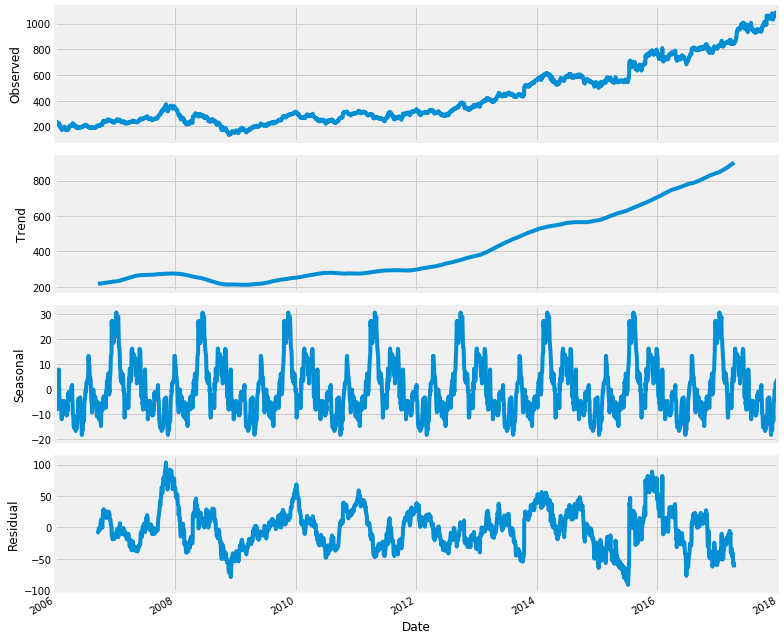

In [184]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* 위 그래프에서는 분명한 상승 trend가 있습니다.
* seasonal change는 균일한 것을 확인할 수 있습니다.
* 특이점과 누락 데이터는 균일하지 않은 것을 확인할 수 있습니다.

## <a id='3.2'>3.2. White noise</a>

시계열 분석에서 White noise는 서로 독립적이고 평균과 분산이 일정한 잡음입니다. 자기상환함수나 편자기상관함수의 값이 유의수준보다 작으면 백색잡음으로 판단합니다.

White noise는 다음과 같은 성질을 가지고 있습니다. 많은 수계열 모형들의 불규칙한 패턴을 의미하고, 정규분포에서 추출된 임의의 수치라고 규정하고 있습니다. 모델의 해석을 전반적으로 편리하게 만듭니다.

- Constant mean : 일정한 평균
- Constant variance : 일정한 분산
- Zero auto-correlation at all lags : 모든 lag에 대해 자기상관계수가 0

아래는 white noise 예시입니다. 

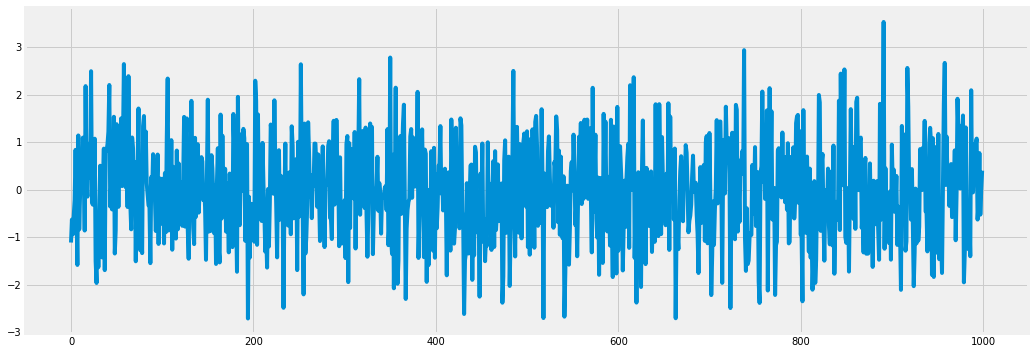

In [185]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

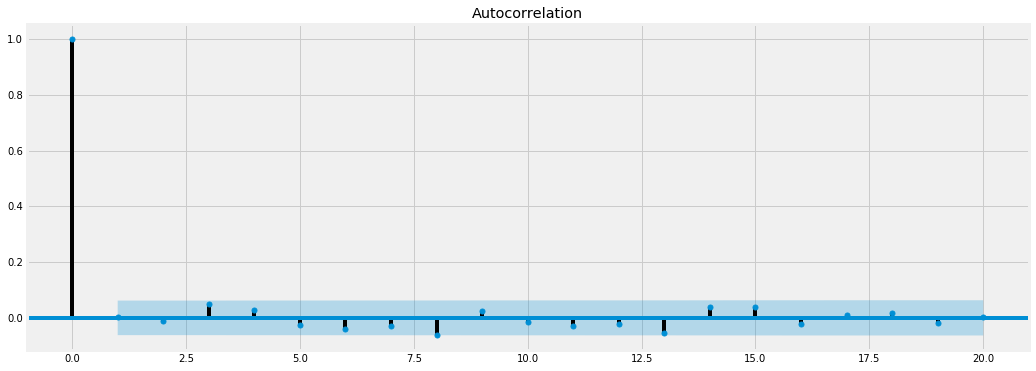

In [186]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

## <a id='3.3'>3.3. Random Walk</a>

**random walk**는 확률론적 랜덤 프로세스로, 단순한 시뮬레이션 입니다.
시계열에서 주식, 정수(integer)과 같은 수 단위의 시스템에서 다음 행동의 확률을 통해 미래를 예측하는 모델링입니다.

주식에서는 보통 다음과 같은 형태가 나타납니다

Today's Price = Yesterday's Price + Noise

즉, 오늘의 가격은 어제의 가격 + 노이즈인거죠.

**P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub>**

Random walk는 미래를 예측하는데 적합하지는 않습니다. 왜냐하면 노이즈 값은 랜덤이기 때문입니다.
아래는 Random Walk에 대한 가설과 검정 예시입니다. (귀무가설과 대립가설)

Random Walk with Drift(drift(μ) is zero-mean)    
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Regression test for random walk   

#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:  

#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)

<br>
Dickey-Fuller Test:  

#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF)는 시계열 샘플에서 단위근이 존재한다는 검정 방법입니다.
Dickey-Fuller에서 lag를 보다 확장하여 사용할 수 있습니다.

각 데이터에서 귀무가설 검정을 해보겠습니다.

In [187]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776519996
p-value of google: 6.510719605768194e-07


각 데이터 결과는 다음과 같이 해석할 수 있습니다.

##### 유의수준 0.05에서  microsoft의 p-value가 0.0003201525이므로, 귀무가설을 기각한다. 즉, 이것은 random walk가 아니다.
##### 유의수준 0.05에서  google의 p-value가 0.000000651이므로, 귀무가설을 기각한다. 즉, 이것은 random walk가 아니다.

### Generating a random walk

랜덤 워크는 다음과 같이 만들 수 있습니다.

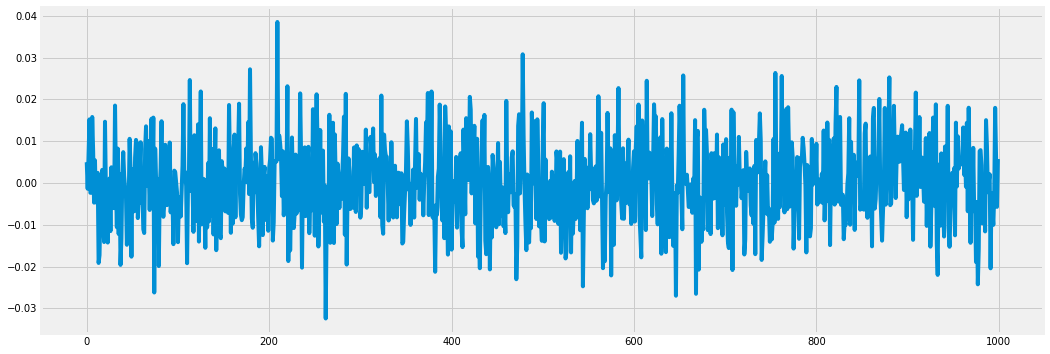

In [188]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [189]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

## <a id='3.4'>3.4 Stationarity</a>
A stationary time series는 평균, 분산, 자기 상관 등의 통계적 특성이 모든 시간에 대해 일정한 시계열입니다. 정상성이라고도 합니다. 보통 시계열 기법은 데이터가 정상적이라고 가정하고 진행하기에 중요한 특성입니다.

이것도 strong과 weak, 두 가지로 나뉩니다.

* Strong stationarity : 어떠한 시점들의 결합확률밀도함수가 시간 축을 이동하여도 변화하지 않는 것 
* Weak stationarity: 평균과 분산이 각각 상수이며 자기상관도(자기공분산)이 시차 k만 의존하고 시점 t와는 무관할떄를 의미합니다.

비정상성(non-stationary) 시계열은 분석하기 어렵기 때문에 정상(stationary) 시계열로 변화시켜줘야합니다. 이는 diff()로 쉽게 변환해줄 수 있습니다. (shift 1)

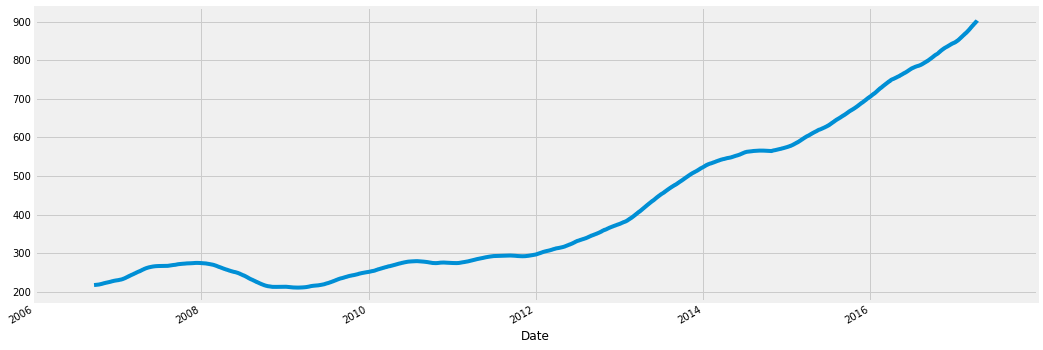

In [190]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

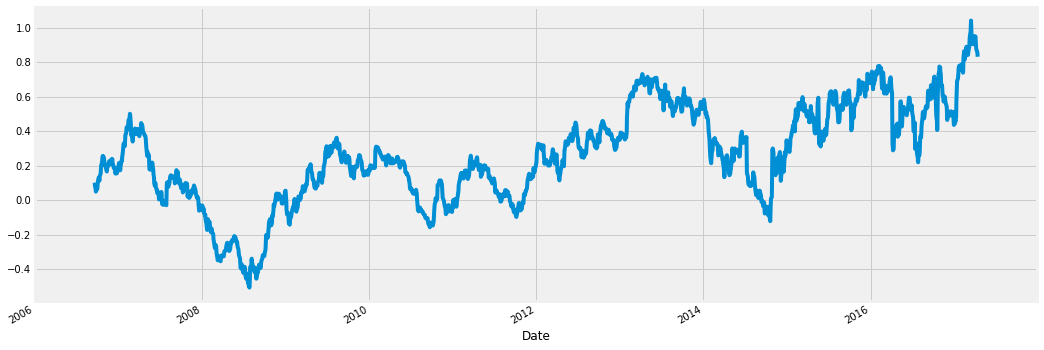

In [191]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

# <a id='4'>4. Modelling using statstools</a>

## <a id='4.1'>4.1 AR models</a>
자동회귀(autoregressive, AR) 모델은 랜덤 프로세스 중 하나입니다. 자연과 경제와 같이 시간이 변하는 일정 과정을 설명할 떄 사용합니다. 자동회귀 모델은 출력 변수가 과거의 값들에 선형 가중합으로 이루어진다는 점을 기반으로 하고 있습니다. 그렇기에 이 모델의 형태들은 선형 식에 따라 다양한 형태를 띕니다.

#### AR(1) model

R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>

1차 AR모델의 식은 다음과 같습니다. μ는 평균 ε는 t에서 노이즈 값을 의미합니다.
백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값만의 가중합으로 이루어진 모형입니다.
계수 ϕ에 따라 모델을 다음과 같이 분류할 수 있습니다. 
 
 - If ϕ = 1, it is random walk. 
 - Else if ϕ = 0, it is white noise
 - Else if -1 < ϕ < 1, it is stationary
 - If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.
 
#### AR(2) model
R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 
#### AR(3) model
R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

## Simulating AR(1) model

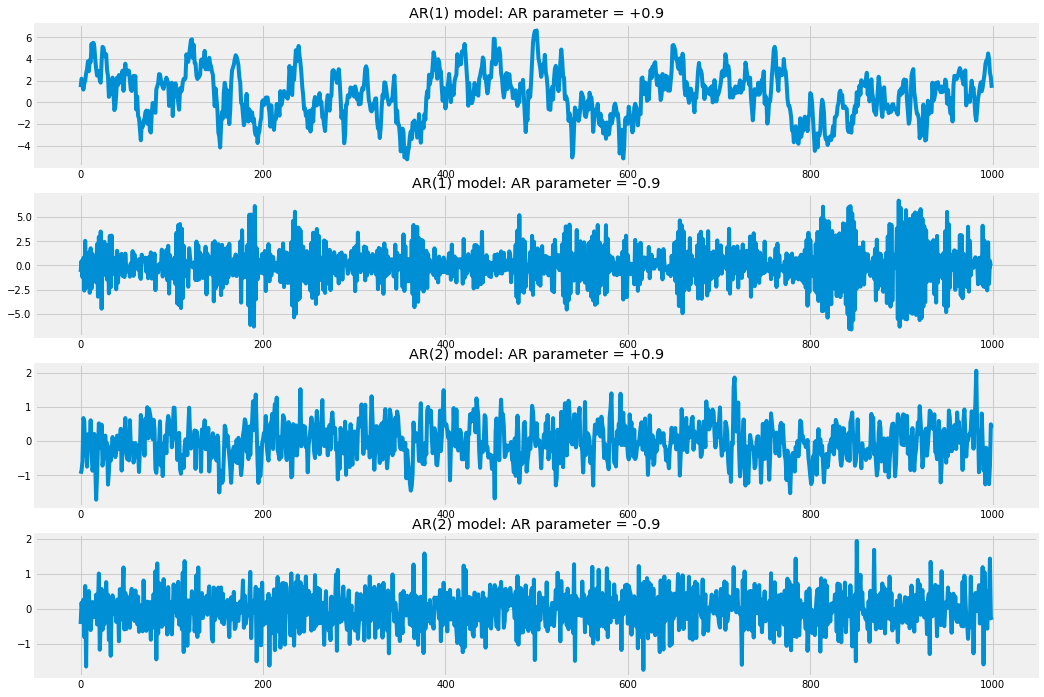

In [192]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

## Forecasting a simulated model

In [193]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Thu, 13 Jun 2019   AIC                           2837.403
Time:                        01:54:27   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

## Predicting the models

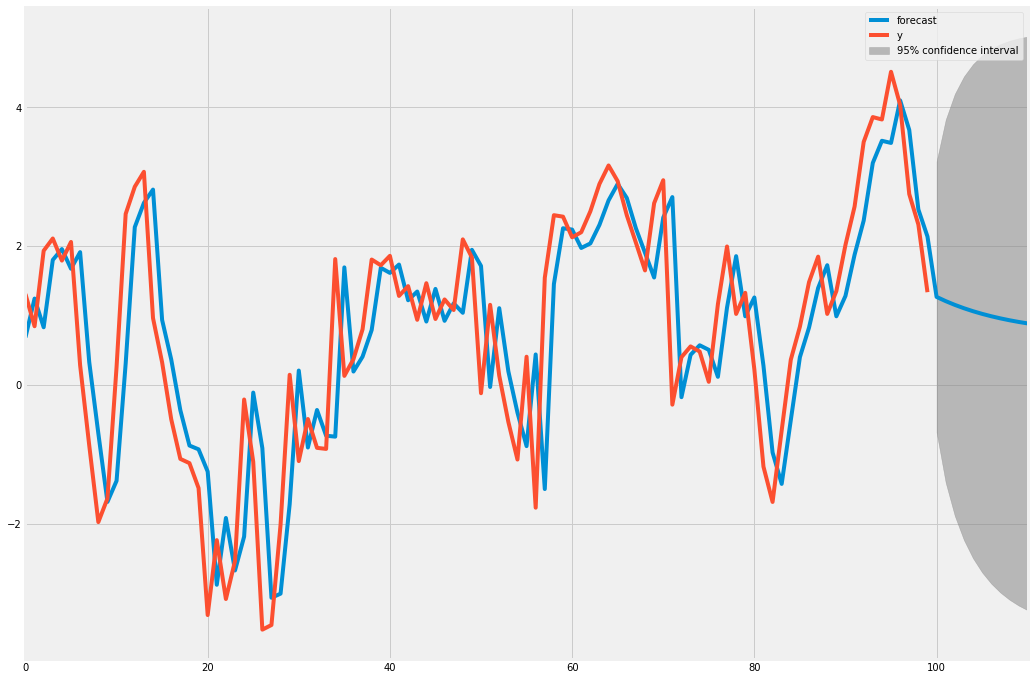

In [194]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [195]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054475798894.


y is predicted plot. Quite neat!

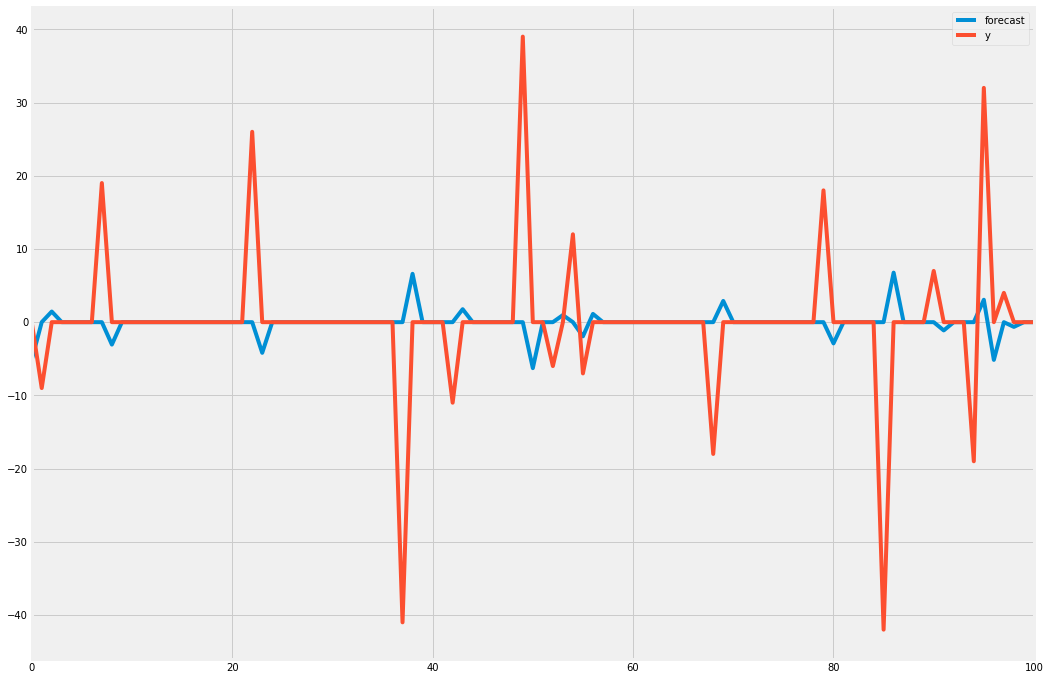

In [226]:
# Predicting humidity level of Montreal
humid_AR = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
result_humid_AR = humid_AR.fit()
result_humid_AR.plot_predict(start=1000, end=1100)
plt.show()

In [211]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result_humid_AR.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.293898305974453.


 Not quite impressive. But let's try google stocks. 

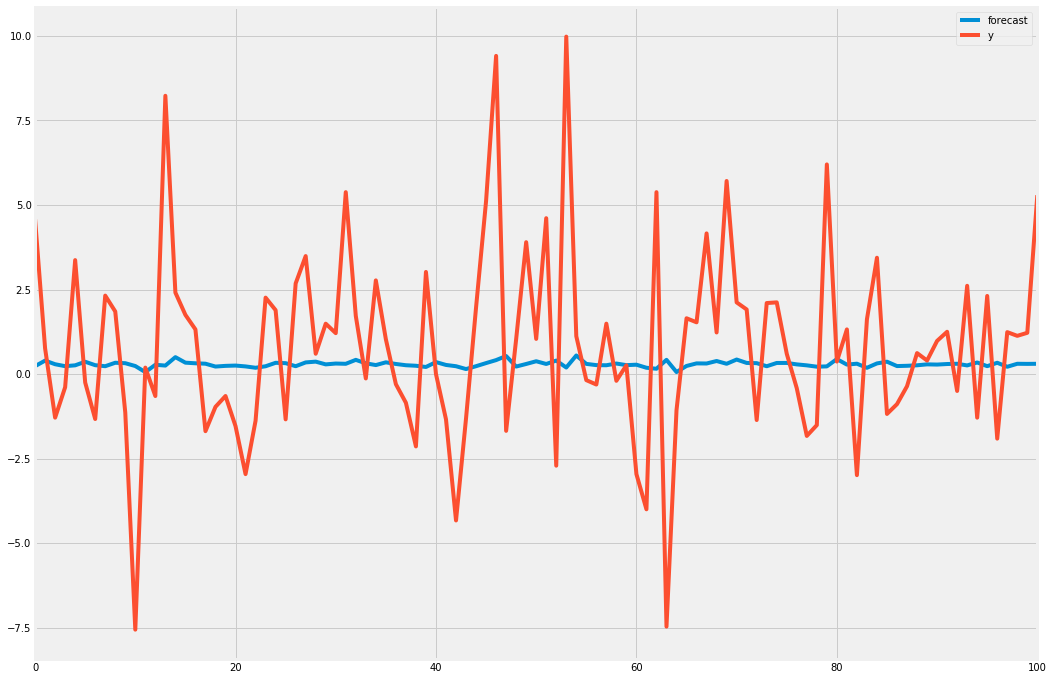

In [227]:
# Predicting closing prices of google
ggl_AR = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
result_ggl_AR = ggl_AR.fit()
result_ggl_AR.plot_predict(start=1000, end=1100)
plt.show()

In [217]:
rmse = math.sqrt(mean_squared_error(google["Close"].diff().iloc[1000:1101].values, result_ggl_AR.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 2.788886542071437.


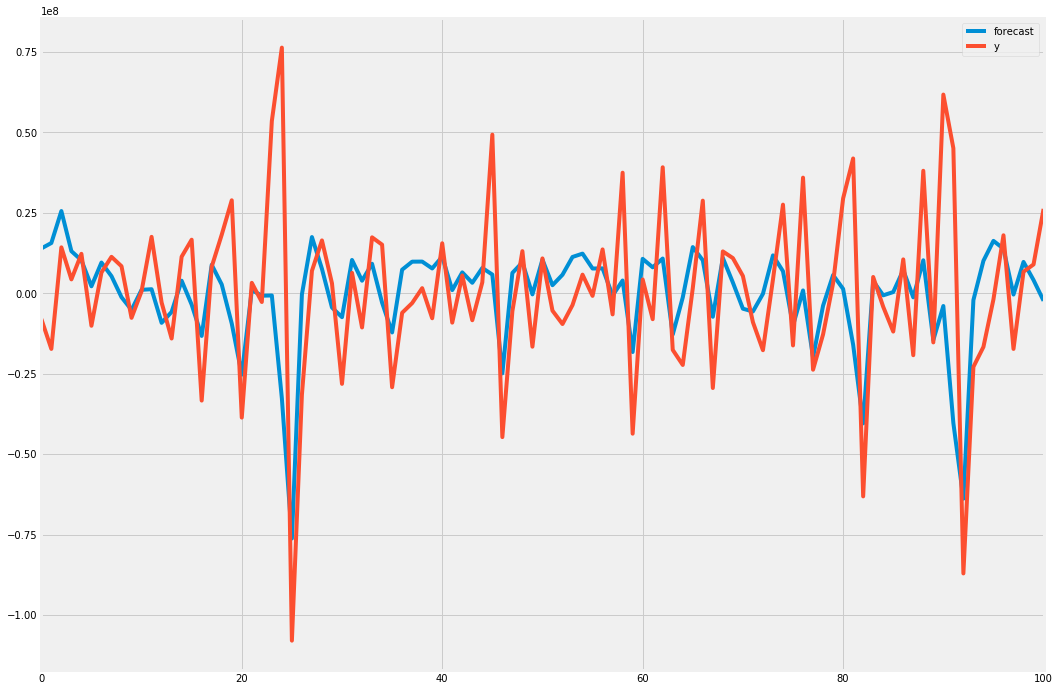

In [234]:
# Forecasting and predicting microsoft stocks volume
micro_AR = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(1,0))
result_micro_AR = micro_AR.fit()
result_micro_AR.plot_predict(start=1000, end=1100)
plt.show()

In [236]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result_micro_AR.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038321.927471854.


## <a id='4.2'>4.2 MA models</a>

이동 평균(moving-avergage, MA) 모델은 평균값 자체가 시간에 따라 변화하는 경향성을 보는 모델입니다. AR모델은 값 자체에 초점을 뒀다면 여기서는 이전에 발생한 error(noise)값을 초점으로 둡니다.

#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

Today's returns = mean + today's noise + yesterday's noise

오늘의 값 = 평균 + 오늘의 노이즈 + 어제의 노이즈

마찬가지로 MA(1)은 lag이 1인 MA모델입니다.

## Simulating MA(1) model

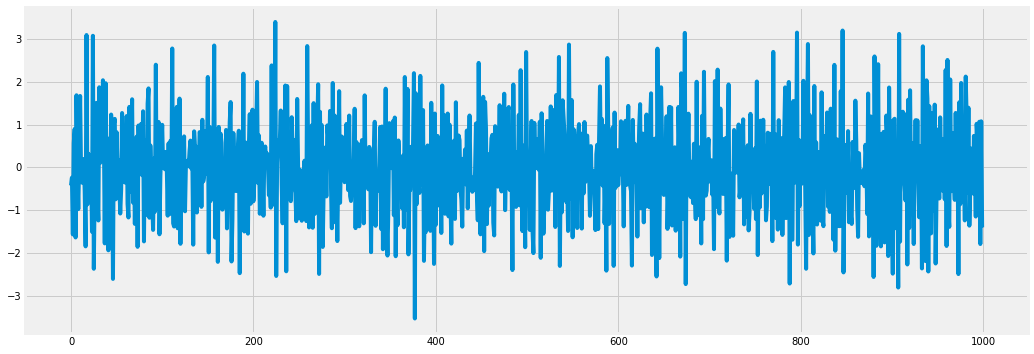

In [125]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

## Forecasting the simulated MA model

In [126]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Wed, 12 Jun 2019   AIC                           2852.553
Time:                        23:09:05   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

## Prediction using MA models

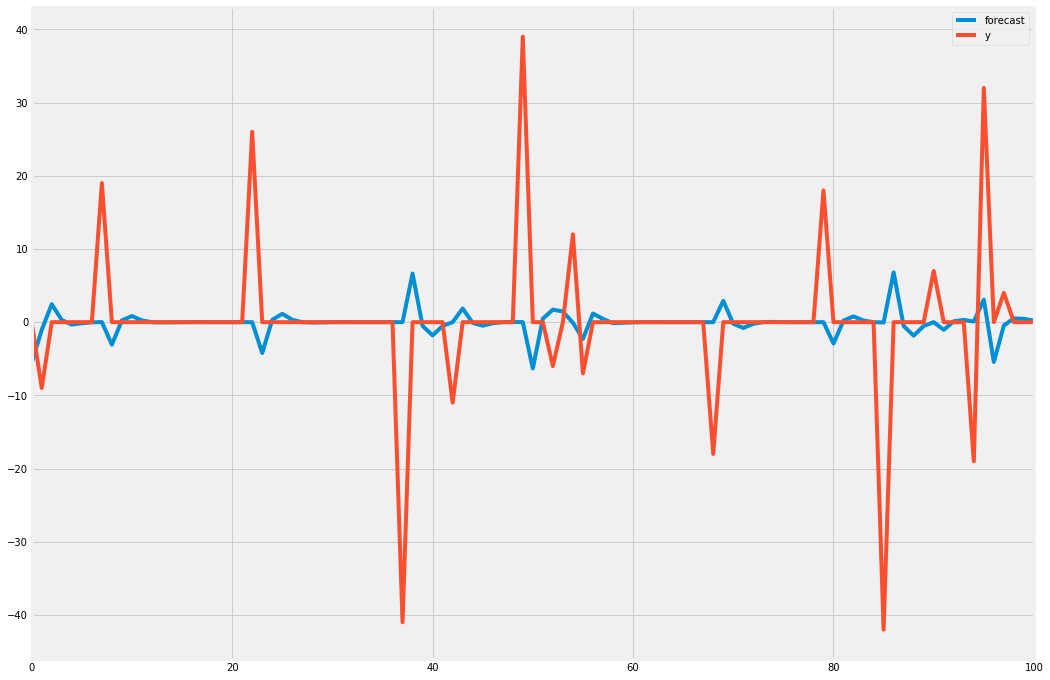

In [228]:
# Forecasting and predicting montreal humidity
humid_MA = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result_humid_MA = humid_MA.fit()
result_humid_MA.plot_predict(start=1000, end=1100)
plt.show()

In [229]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result_humid_MA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.34512883992114.


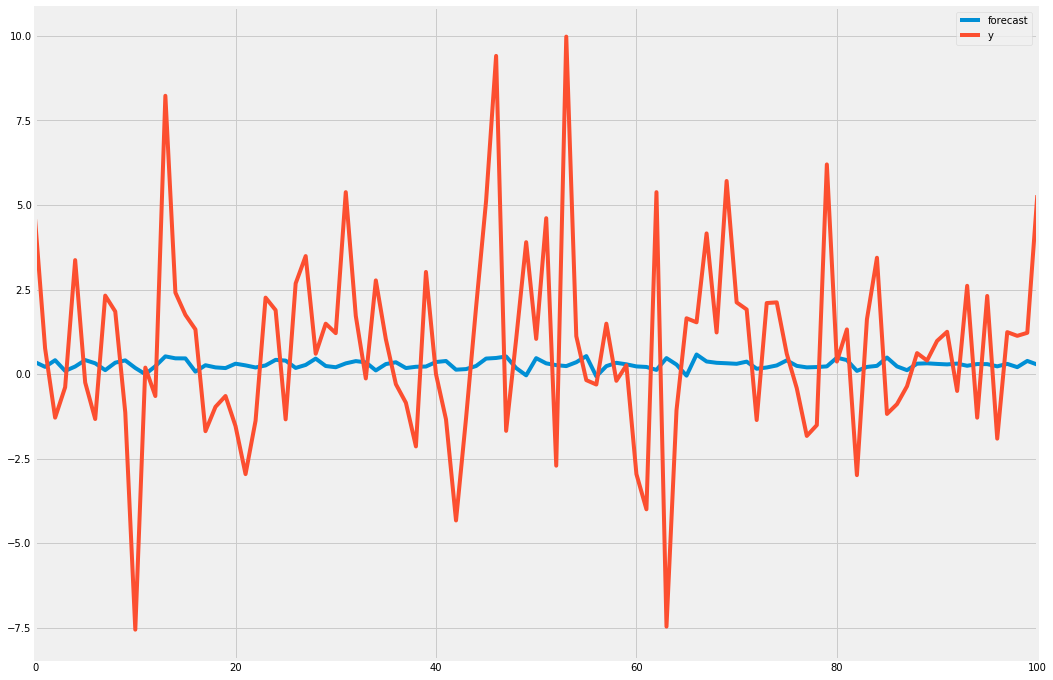

In [216]:
# Forecasting and predicting montreal humidity
ggl_MA = ARMA(google["Close"].diff().iloc[1:].values, order=(0,3))
result_ggl_MA = ggl_MA.fit()
result_ggl_MA.plot_predict(start=1000, end=1100)
plt.show()

In [219]:
rmse = math.sqrt(mean_squared_error(google["Close"].diff().iloc[1000:1101].values, result_ggl_MA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 2.802955599949723.


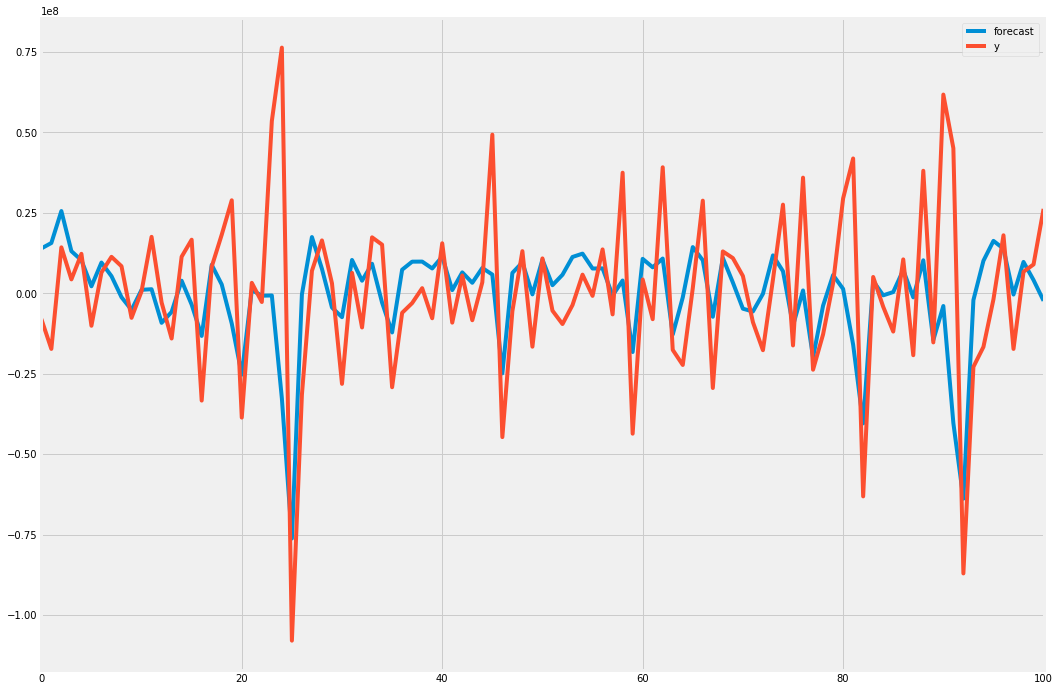

In [234]:
# Forecasting and predicting microsoft stocks volume
micro_MA = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(0,3))
result_micro_MA = micro_MA.fit()
result_micro_MA.plot_predict(start=1000, end=1100)
plt.show()

In [236]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result_micro_MA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038321.927471854.


이제 ARMA model을 볼 차례입니다.

## <a id='4.3'>4.3 ARMA models</a>

AR과 MA의 모델을 합친 모델입니다.

### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

오늘의 값 = 평균 + 어제의 값 + 노이즈 + 어제의 노이즈

## Prediction using ARMA models

시뮬레이트는 이전과 비슷해서 따로 진행하지 않고, 예측 과정만 진행합니다.

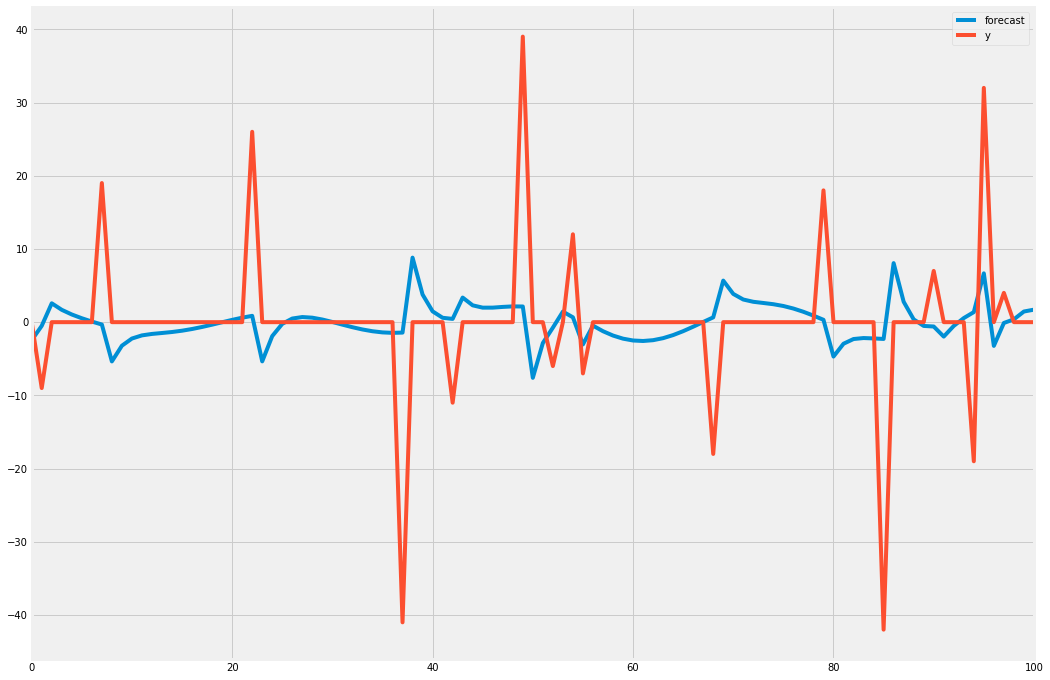

In [230]:
# Forecasting and predicting montreal humidity
humid_ARMA = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(3,3))
result_humid_ARMA = humid_ARMA.fit()
print(result_humid_ARMA.summary())
result_humid_ARMA.plot_predict(start=1000, end=1100)
plt.show()

In [231]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result_humid_ARMA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.731545274859858.


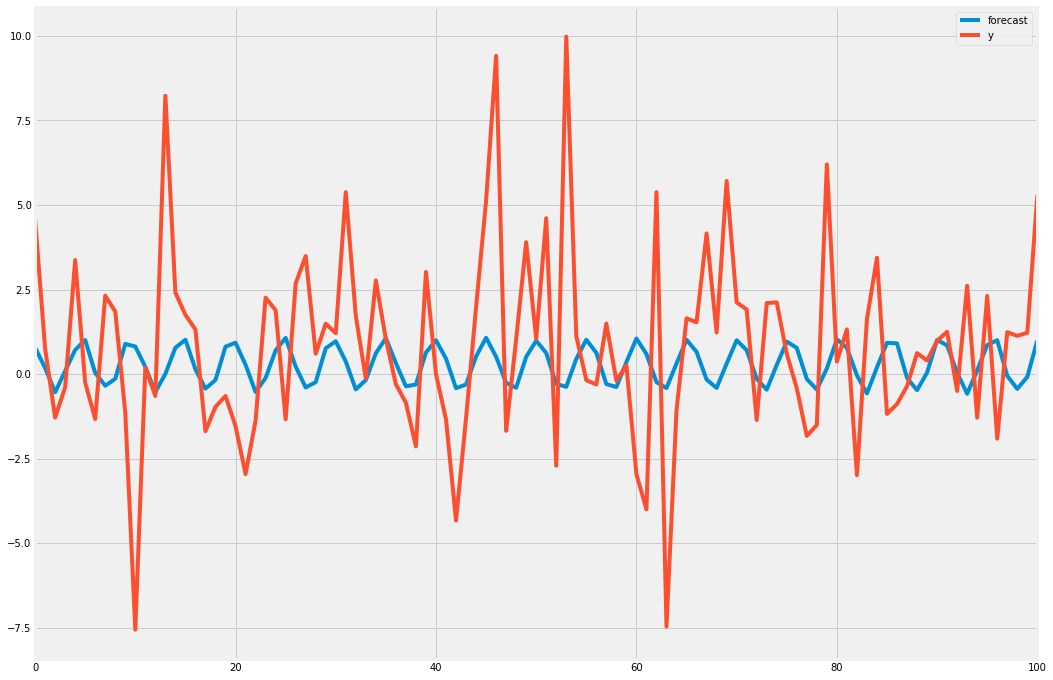

In [232]:
# Forecasting and predicting montreal humidity
ggl_ARMA = ARMA(google["Close"].diff().iloc[1:].values, order=(3,3))
result_ggl_ARMA = ggl_ARMA.fit()
result_ggl_ARMA.plot_predict(start=1000, end=1100)
plt.show()

In [233]:
rmse = math.sqrt(mean_squared_error(google["Close"].diff().iloc[1000:1101].values, result_ggl_ARMA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 2.822998963267449.


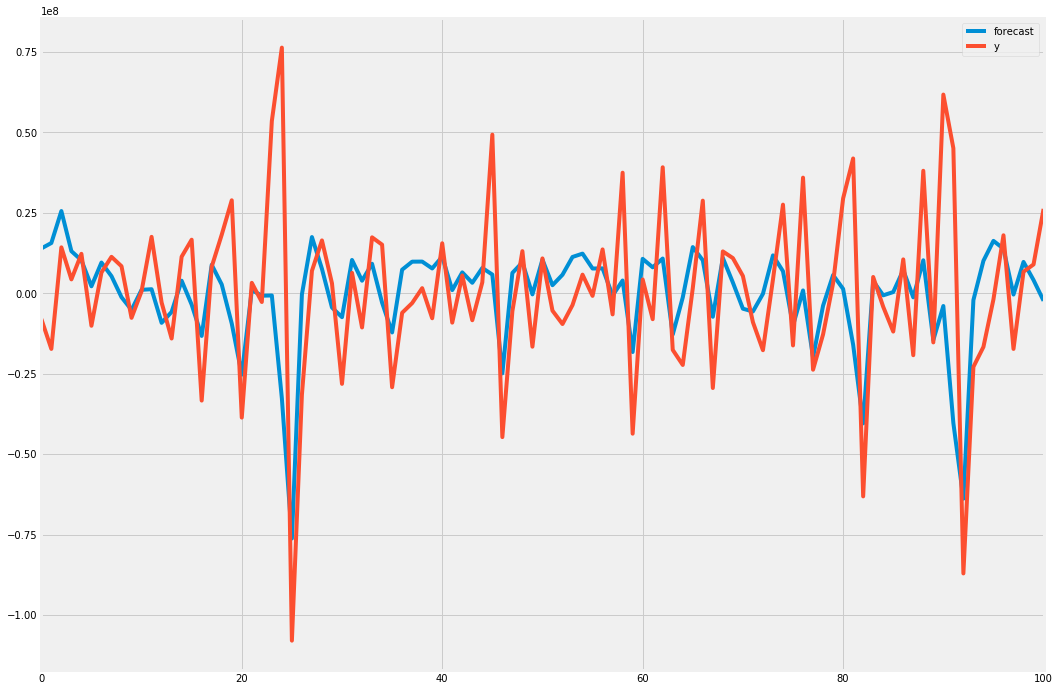

In [234]:
# Forecasting and predicting microsoft stocks volume
micro_ARMA = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result_micro_ARMA = micro_ARMA.fit()
result_micro_ARMA.plot_predict(start=1000, end=1100)
plt.show()

In [236]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result_micro_ARMA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038321.927471854.


AR, MA 모델에 비해 좋은 결과가 나오는 것을 확인할 수 있습니다.

## <a id='4.4'>4.4 ARIMA models</a>
autoregressive integrated moving average (ARIMA) model은 ARMA가 과거의 데이터들을 사용하는 것에 반해 ARIMA 모형은 이것을 넘어서 과거의 데이터가 지니고 있던 **`추세(momentum)`**까지 반영하는 모델입니다.

### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

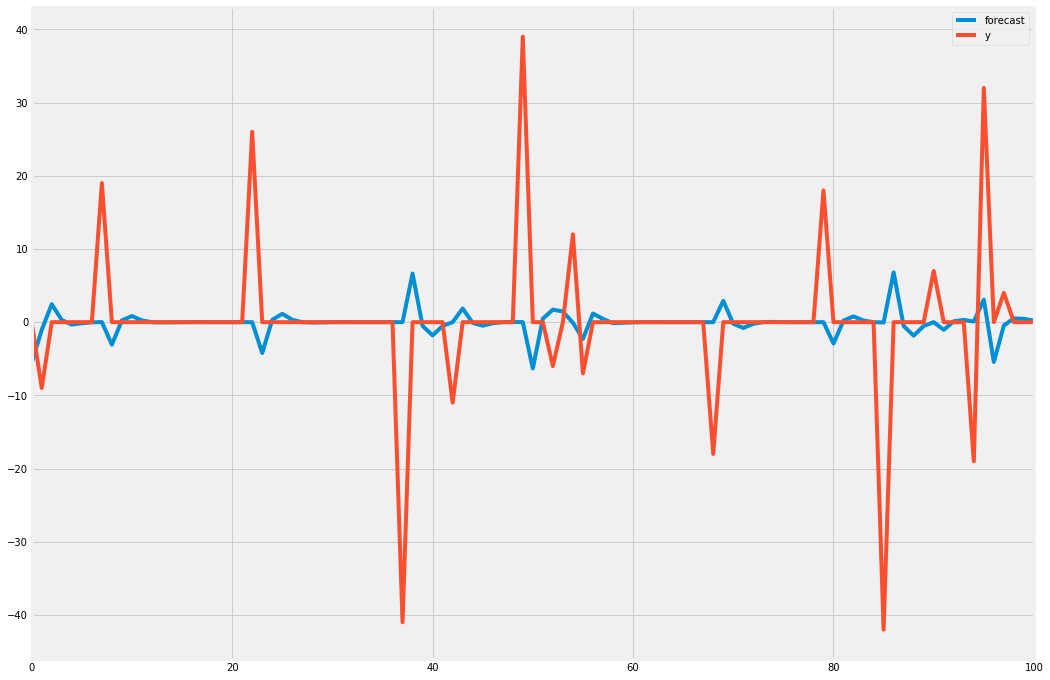

In [228]:
rcParams['figure.figsize'] = 16, 6
# Forecasting and predicting montreal humidity
humid_ARIMA = ARIMA(humidity["Montreal"].diff().iloc[1:].values, order=(2,1,0))
result_humid_ARIMA = humid_ARIMA.fit()
print(result_humid_ARIMA.summary())
result_humid_ARIMA.plot_predict(start=1000, end=1100)
plt.show()

In [229]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result_humid_ARIMA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.34512883992114.


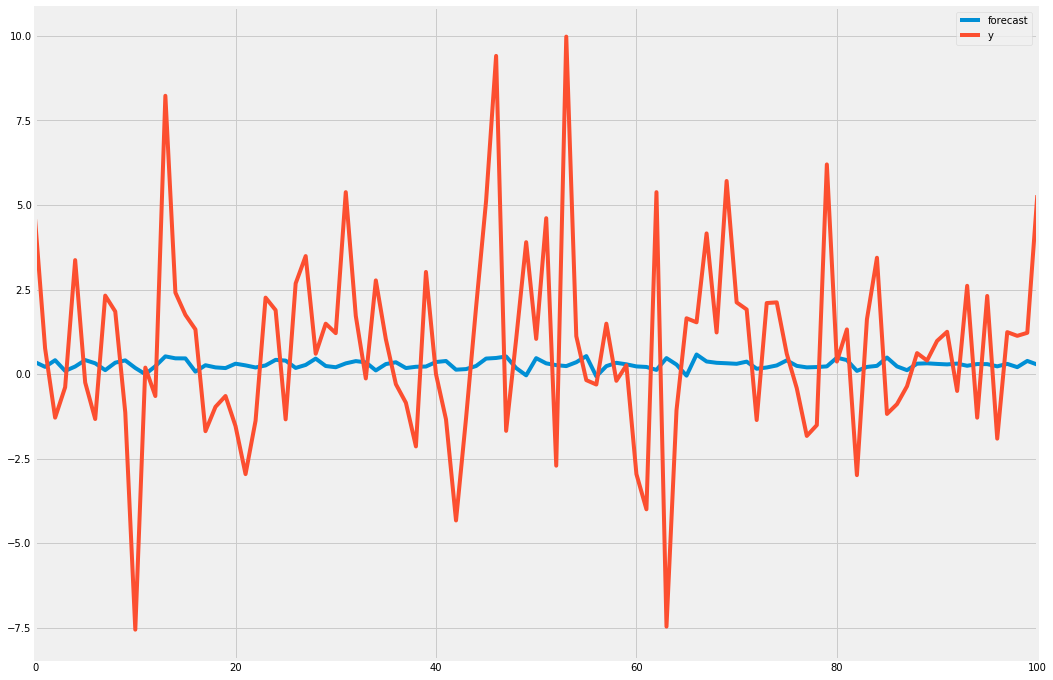

In [216]:
# Forecasting and predicting montreal humidity
ggl_ARIMA = ARIMA(google["Close"].diff().iloc[1:].values, order=(2,1,0))
result_ggl_ARIMA = ggl_ARIMA.fit()
result_ggl_ARIMA.plot_predict(start=1000, end=1100)
plt.show()

In [219]:
rmse = math.sqrt(mean_squared_error(google["Close"].diff().iloc[1000:1101].values, result_ggl_MA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 2.802955599949723.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.008
Date:                Wed, 12 Jun 2019   AIC                         112778.933
Time:                        23:13:17   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

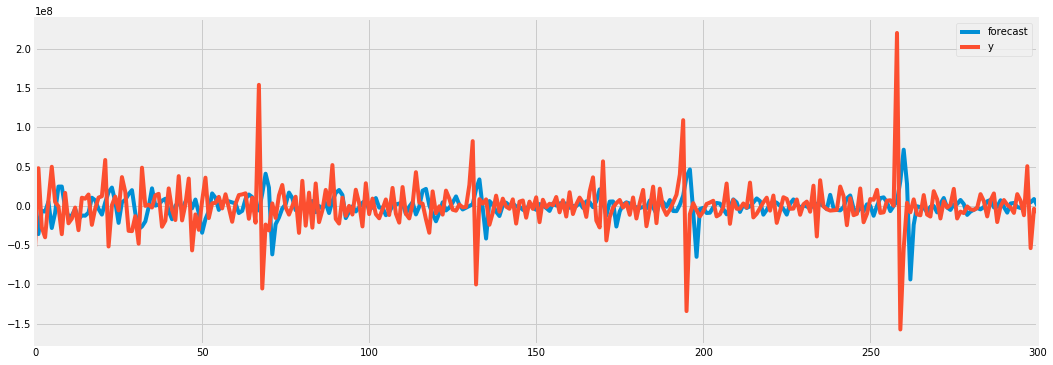

In [131]:
# Predicting the microsoft stocks volume
micro_ARIMA = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result_micro_ARIMA = micro_ARIMA.fit()
result_micro_ARIMA.plot_predict(start=1000, end=1100)
plt.show()

In [132]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result_micro_ARIMA.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937614.65140498.


보다 섬세한 모델임을 확인할 수 있습니다.

## <a id='4.5'>4.5 VAR models</a>

Vector autoregression (VAR) 모델은 벡터 시계열에 대한 모델입니다. 여러 시계열에 대한 선형 상호종속성을 확인하는데 사용합니다. 하나 이상의 변수를 허용하며 단일 변수 AR을 일반화한 모델입니다.

<img src="http://gdurl.com/VvRm">

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.012
                          + intercept   AIC                          24404.024
Date:                Tue, 21 May 2019   BIC                          24506.233
Time:                        08:12:21   HQIC                         24440.777
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.51, 79.05   Jarque-Bera (JB):   48149.93, 14918.07
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.31, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

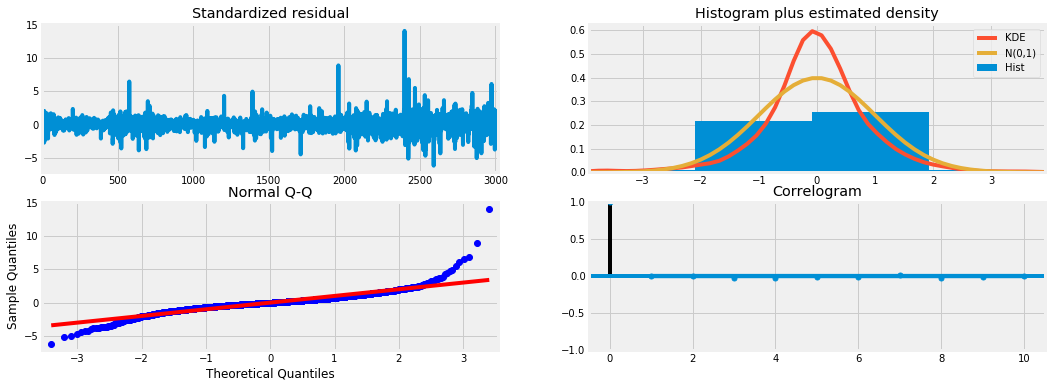

In [70]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

# <a id='5'>5 Modelling using Neural Network</a>

이번에는 Neural Network를 사용하여 시계열 분석을 하는 과정을 다뤄봅니다. 최근 Neural Network를 사용한 Deep Learning Model들은 많은 분야에서 뛰어난 성능을 보이며 계속해서 많은 논문과 성과를 내고있습니다. 위에서 여러 시계열 분석방법을 배웠지만 Deep Learning 방법이 지금까지 나온 시계열 분석방법보다 더 좋은 성능 나타냅니다. 

그러나 Deep Learning과 기존 시계열 분석 방법의 차이점은 `설명가능성`입니다. 위에서 배운 시계열 분석방법들은 모델에 대한 충분한 설명성을 나타낼 수 있습니다. 그러나 Deep Learning의 경우 아직까지 모델이 나타낸 성능에 대한 설명성이 부족합니다. 이러한 black box적인 요소때문에 뛰어난 성능을 보임에도 불구하고 설명성을 나타내지 못해 실제 사용에 이르기까지는 어려움이 있습니다. Deep Learning의 설명가능성은 앞으로도 계속해서 연구해야할 과제입니다.
  
시계열을 다루는 Neural Network 방법은 대표적으로 Recurrent Neural Network, Long Short Turm Memory(LSTM), Gated Recurrent Units이 있습니다. 각 모델의 원리과 과정을 이해하며 코드는 Keras를 사용하여 실습합니다.

In [262]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [238]:
# First, we get the data
dataset = pd.read_csv('../dataset/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [239]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

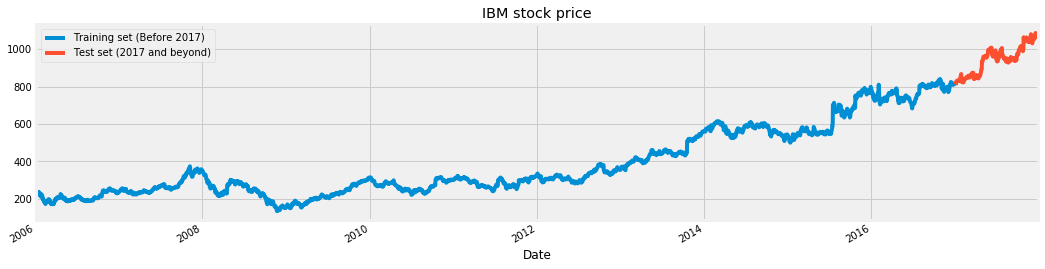

In [240]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [241]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [253]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [254]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## <a id='5.1'>5.1 Recurrent Neural Network(RNN)</a>

RNN은 은닉층에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층의 다음 계산의 입력으로 보내는 특징을 갖고있습니다. RNN에서는 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드(node)를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행할 수 있으므로 이를 보통 메모리 셀 또는 RNN 셀이라고 표현합니다.   

은닉층의 메모리 셀은 각각의 시점(time-step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값들을 계속해서 자신의 입력으로 보내는 재귀적 활동을 하고 있습니다. (앞으로는 현재 시점을 t로 표현하고, 이전 시점을 t-1, 다음 시점을 t+1와 같은 형식으로 표현하겠습니다.) 이는 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것임을 의미합니다.  

그리고 메모리 셀이 다음 시점 t+1에 다시 자신에게 보내는 이 값을 은닉 상태(hidden state)라고 합니다. 다시 말해 현재 시점 t의 메모리 셀은 이전 시점 t-1에서의 메모리 셀이 보낸 은닉 상태값을 다시 계산을 위한 입력값으로 사용합니다. 위의 그림에서 입력층의 xt는 현재 시점 t에서의 입력값, 출력층의 yt는 현재 시점 t에서의 출력층의 출력값을 의미합니다.

Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

### RNN의 한계
바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다는 것을 언급한 바 있습니다. 하지만, 앞서 배운 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있습니다. 즉, RNN의 시점(time-step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생합니다. 위의 그림은 첫번째 입력값인 x1의 정보량을 짙은 남색으로 표현했을 때, 색이 점차 얕아지는 것으로 시점이 지날수록 x1의 정보량이 손실되어가는 과정을 표현하였습니다. 뒤로 갈수록 x1의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 x1의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있습니다.

어쩌면 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있습니다. RNN으로 만든 언어 모델이 다음 단어를 예측하는 과정을 생각해봅시다. 예를 들어 ''모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 그런데 글쎄 직장 상사한테 전화가 왔어. 어디냐고 묻더라구 그래서 나는 말했지. 저 여행왔는데요. 여기 ___'' 다음 단어를 예측하기 위해서는 장소 정보가 필요합니다. 그런데 장소 정보에 해당되는 단어인 '러시아'는 앞에 위치하고 있고, RNN이 충분한 기억력을 가지고 있지 못한다면 다음 단어를 엉뚱하게 예측합니다.

이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 합니다.

Source: [wikidocs](https://wikidocs.net/22886)

In [264]:
# The SimpleRNN architecture
regressor_rnn = Sequential()
# First SimpleRNN layer with Dropout regularisation
regressor_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor_rnn.add(Dropout(0.2))
# Second SimpleRNN layer
regressor_rnn.add(SimpleRNN(units=50, return_sequences=True))
regressor_rnn.add(Dropout(0.2))
# Third SimpleRNN layer
regressor_rnn.add(SimpleRNN(units=50, return_sequences=True))
regressor_rnn.add(Dropout(0.2))
# Fourth SimpleRNN layer
regressor_rnn.add(SimpleRNN(units=50))
regressor_rnn.add(Dropout(0.2))
# The output layer
regressor_rnn.add(Dense(units=1))

# Compiling the RNN
regressor_rnn.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor_rnn.fit(X_train,y_train,epochs=2,batch_size=32,verbose=1)

Epoch 1/2
2708/2708 [==============================] - 10s 4ms/step - loss: 0.3308
Epoch 2/2
2708/2708 [==============================] - 8s 3ms/step - loss: 0.1238


In [265]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [266]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor_rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

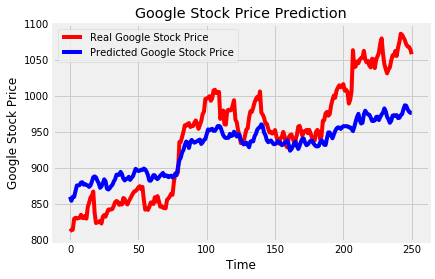

In [267]:
# Visualizing the results for RNN
plot_predictions(test_set,predicted_stock_price)

In [261]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 313.6365449780093.


## <a id='5.2'>5.2 Long Short Term Memory(LSTM)</a>

전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 합니다. LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다. 요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였습니다. 위의 그림에서는 t시점의 셀 상태를 Ct로 표현하고 있습니다. LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보입니다.   

셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선입니다. 셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됩니다.  
 
은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용합니다. 각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부르며 이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재합니다. 시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 가지고 게이트를 조절합니다.   

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

Source: [wikidocs](https://wikidocs.net/22888)

## Components of LSTMs

* Forget Gate “f” ( a neural network with sigmoid)
* Candidate layer “C"(a NN with Tanh)
* Input Gate “I” ( a NN with sigmoid )
* Output Gate “O”( a NN with sigmoid)
* Hidden state “H” ( a vector )
* Memory state “C” ( a vector)

* Inputs to the LSTM cell at any step are X<sub>t</sub> (current input) , H<sub>t-1</sub> (previous hidden state ) and C<sub>t-1</sub> (previous memory state).  
* Outputs from the LSTM cell are H<sub>t</sub> (current hidden state ) and C<sub>t</sub> (current memory state)

## Working of gates in LSTMs
첫째로, LSTM cell은 이전 memory state C<sub>t-1</sub>을 받아옵니다. 그리고 forget gate (f)와 연산을 통해 현재 memory state C를 얼마나 반영할지 결정합니다. 만약 forget gate값이 0이라면 이전 memory state는 사용하지 않고, forget gate값이 1이라면 이전 memory state를 전부 현재 cell에 반영합니다. (forget fate 값은 0에서 1사이의 값입니다.)


**C<sub>t</sub> = C<sub>t-1</sub> * f<sub>t</sub>**

Calculating the new memory state: 

**C<sub>t</sub> = C<sub>t</sub> + (I<sub>t</sub> * C\`<sub>t</sub>)**

Now, we calculate the output:

**H<sub>t</sub> = tanh(C<sub>t</sub>)**

In [257]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=2,batch_size=32,verbose=1)

Epoch 1/2
2708/2708 [==============================] - 26s 9ms/step - loss: 0.0178
Epoch 2/2
2708/2708 [==============================] - 23s 8ms/step - loss: 0.0070


In [259]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

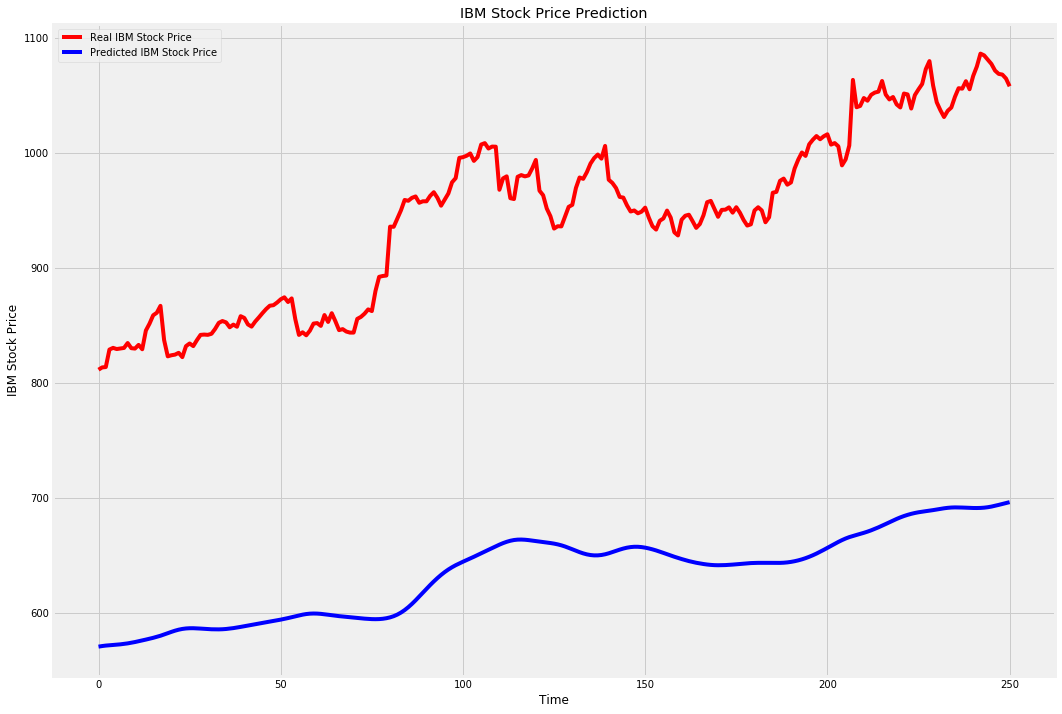

In [260]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [261]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 313.6365449780093.


## <a id='5.3'>5.3 Gated Recurrent Units(GRU)</a>
GRU(Gated Recurrent Unit)는 2014년 뉴욕대학교 조경현 교수님이 집필한 논문에서 제안되었습니다. GRU는 LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄였습니다. 다시 말해서, GRU는 성능은 LSTM과 유사하면서 복잡했던 LSTM의 구조를 다시 간단화 시켰습니다.  

LSTM에서는 출력, 입력, 삭제 게이트라는 3개의 게이트가 존재했습니다. 반면, GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만이 존재합니다. GRU는 LSTM보다 학습 속도가 빠르다고 알려져있지만 여러 평가에서 GRU는 LSTM과 비슷한 성능을 보인다고 알려져 있습니다.  

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

반드시 LSTM 대신 GRU를 사용하는 것이 좋지는 않습니다. GRU와 LSTM 중 어떤 것이 모델의 성능면에서 더 낫다라고 단정지어 말할 수 없으며, 기존에 LSTM을 사용하면서 최적의 하이퍼 파라미터를 찾아낸 상황이라면 굳이 GRU로 바꿔서 사용할 필요는 없습니다.

Source: [wikidocs](https://wikidocs.net/22889)

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

References and influences(These have more in-depth content and explanations): 
* [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
* [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
* [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
* [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
* [State space models](https://www.statsmodels.org/dev/statespace.html)

Stay tuned for more! And don't forget to upvote and comment.